 ## EDA

In [12]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn as sk
import seaborn as sns

In [13]:
import matplotlib.pyplot as plt

In [14]:
uber_df = pd.read_csv('UberDataset.csv')

In [15]:
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [16]:
uber_df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [17]:
 uber_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   str    
 1   END_DATE    1155 non-null   str    
 2   CATEGORY    1155 non-null   str    
 3   START       1155 non-null   str    
 4   STOP        1155 non-null   str    
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    str    
dtypes: float64(1), str(6)
memory usage: 63.3 KB


In [18]:
uber_df.size,uber_df.shape

(8092, (1156, 7))

In [19]:
list(uber_df.columns)

['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES', 'PURPOSE']

## data preprocessing

In [20]:
uber_df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [21]:
uber_df['CATEGORY'].fillna('not', inplace = True)

C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\2888512198.py:1: ChainedAssignmentError: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  uber_df['CATEGORY'].fillna('not', inplace = True)


0       Business
1       Business
2       Business
3       Business
4       Business
          ...   
1151    Business
1152    Business
1153    Business
1154    Business
1155         not
Name: CATEGORY, Length: 1156, dtype: str

In [22]:
uber_df.fillna({'PURPOSE':'not'},inplace = True)
uber_df.fillna({'CATEGORY':'not'},inplace = True)
uber_df.fillna({'STOP':'not'},inplace = True)
uber_df.fillna({'END_DATE':0},inplace = True)
uber_df.fillna({'START':'not'},inplace = True)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,not
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [23]:
uber_df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [24]:
uber_df[uber_df.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [25]:
uber_df.drop_duplicates(inplace = True)

In [26]:
uber_df.describe()

,MILES
count,1155.000000
mean,21.125108
std,359.454497
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [27]:
uber_df['MILES'].max()

np.float64(12204.7)

In [28]:
uber_df.describe(include=['object'])

C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\2295662770.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  uber_df.describe(include=['object'])


,START_DATE,END_DATE,CATEGORY,START,STOP,PURPOSE
count,1155,1155,1155,1155,1155,1155
unique,1155,1155,3,178,189,11
top,01-01-2016 21:11,01-01-2016 21:17,Business,Cary,Cary,not
freq,1,1,1077,201,202,503


In [29]:
uber_df['START_DATE'] = pd.to_datetime(uber_df['START_DATE'],errors = 'coerce')
uber_df['END_DATE'] = pd.to_datetime(uber_df['END_DATE'],errors = 'coerce')


In [30]:
from datetime import datetime

In [31]:
uber_df['date'] = pd.DatetimeIndex(uber_df['START_DATE']).date
uber_df['time'] = pd.DatetimeIndex(uber_df['START_DATE']).hour
uber_df['day-night'] = pd.cut(x = uber_df['time'], bins=[0,10,15,19,24], labels = ['moring','afternoon','evening','night'])



In [32]:
uber_df.dtypes, uber_df.head()

(START_DATE    datetime64[us]
 END_DATE      datetime64[us]
 CATEGORY                 str
 START                    str
 STOP                     str
 MILES                float64
 PURPOSE                  str
 date                  object
 time                 float64
 day-night           category
 dtype: object,
            START_DATE            END_DATE  CATEGORY        START  \
 0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business  Fort Pierce   
 1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business  Fort Pierce   
 2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business  Fort Pierce   
 3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business  Fort Pierce   
 4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business  Fort Pierce   
 
               STOP  MILES          PURPOSE        date  time  day-night  
 0      Fort Pierce    5.1   Meal/Entertain  2016-01-01  21.0      night  
 1      Fort Pierce    5.0              not  2016-01-02   1.0     moring  
 2      Fort Pierce    4.8  Errand/Supplies

In [33]:
objects= uber_df.select_dtypes(include="object").columns
uber_df[objects]= uber_df[objects].astype("object")

C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\2232252538.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  objects= uber_df.select_dtypes(include="object").columns


## **visualization**

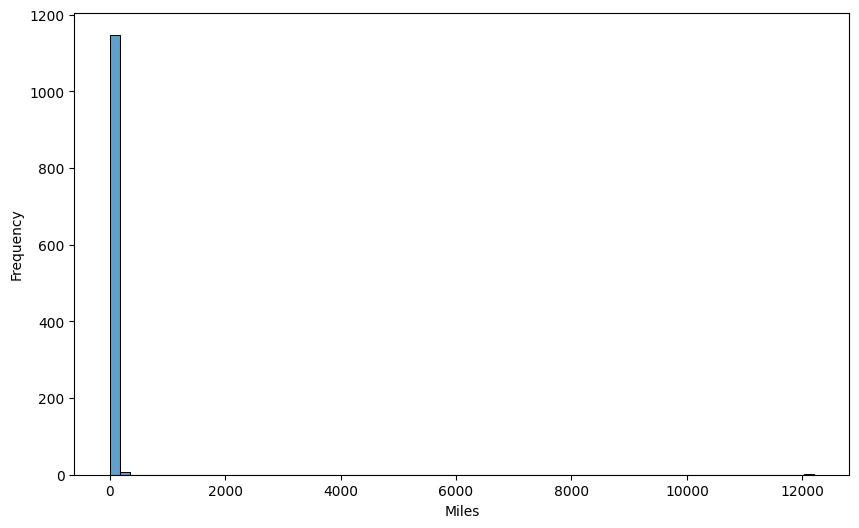

In [34]:
plt.figure(figsize = (10,6))
sns.histplot(uber_df['MILES'],alpha = 0.7)
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

In [35]:
uber_df['START'].value_counts().head(10)

START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               36
Lahore               36
Raleigh              28
Kar?chi              27
Apex                 17
Name: count, dtype: int64

In [36]:
uber_df["START"].value_counts().iloc[:10].index



Index(['Cary', 'Unknown Location', 'Morrisville', 'Whitebridge', 'Islamabad',
       'Durham', 'Lahore', 'Raleigh', 'Kar?chi', 'Apex'],
      dtype='object', name='START')

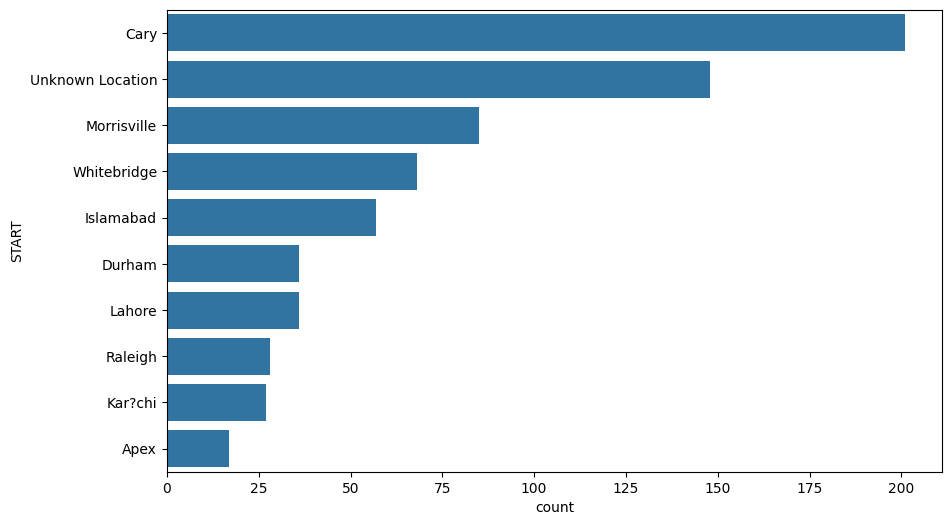

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(y = 'START', order = uber_df["START"].value_counts().iloc[:10].index, data = uber_df)
plt.show()

In [38]:
obj= (uber_df.dtypes == 'object')
object_cols = list(obj[obj].index)
unique_values ={}
for col in object_cols:
    unique_values[col] = uber_df[col].unique().size

unique_values

{'CATEGORY': 3, 'START': 178, 'STOP': 189, 'PURPOSE': 11, 'date': 115}

C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\3962600733.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(uber_df['CATEGORY'], palette = 'Set2')
C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\3962600733.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(uber_df['PURPOSE'], palette ='Set3')


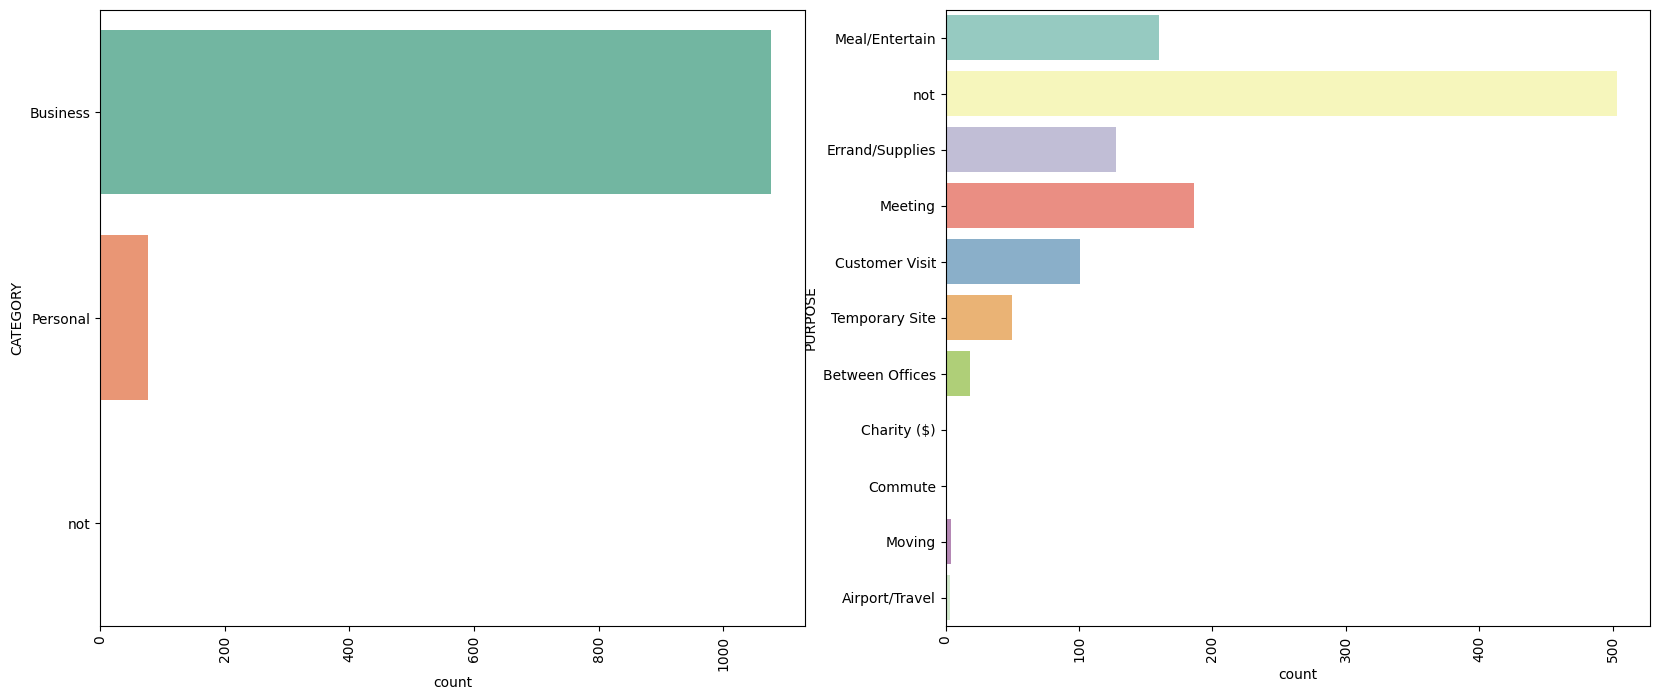

In [39]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(uber_df['CATEGORY'], palette = 'Set2')
plt.xticks(rotation = 90)


plt.subplot(1,2,2)
sns.countplot(uber_df['PURPOSE'], palette ='Set3')
plt.xticks(rotation = 90)
plt.show()


C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\2870044373.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(uber_df['day-night'], palette = 'coolwarm', edgecolor = 'black')


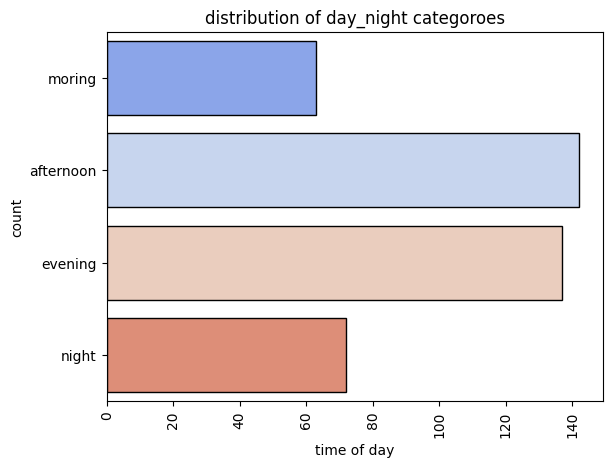

In [40]:
sns.countplot(uber_df['day-night'], palette = 'coolwarm', edgecolor = 'black')
plt.xticks(rotation = 90)

plt.xlabel('time of day')
plt.ylabel('count')
plt.title('distribution of day_night categoroes')
plt.show()

import warnings
warnings.filterwarnings('once',message ='deprecated', category ,module = 'add_module_name', lineno = 21 , append)

In [41]:
uber_df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'date', 'time', 'day-night'],
      dtype='str')

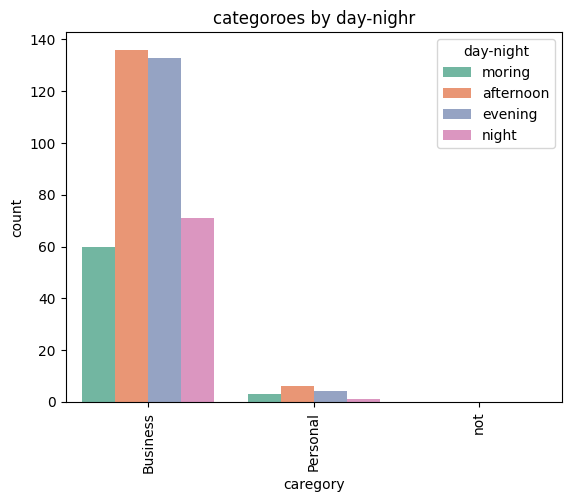

In [42]:
plt.Figure(figsize = (10,6))
sns.countplot(data = uber_df, x ='CATEGORY',hue ='day-night' ,palette ='Set2')
plt.xticks(rotation = 90)
plt.title('categoroes by day-nighr')
plt.xlabel('caregory')
plt.ylabel('count')
plt.show()


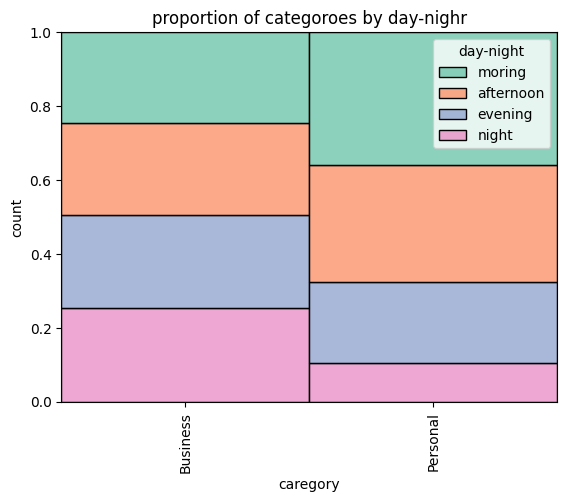

In [43]:
plt.Figure(figsize = (10,6))
sns.histplot(data = uber_df, x ='CATEGORY',hue ='day-night',stat ='probability',common_norm = False, multiple ='fill',palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('proportion of categoroes by day-nighr')
plt.xlabel('caregory')
plt.ylabel('count')
plt.show()


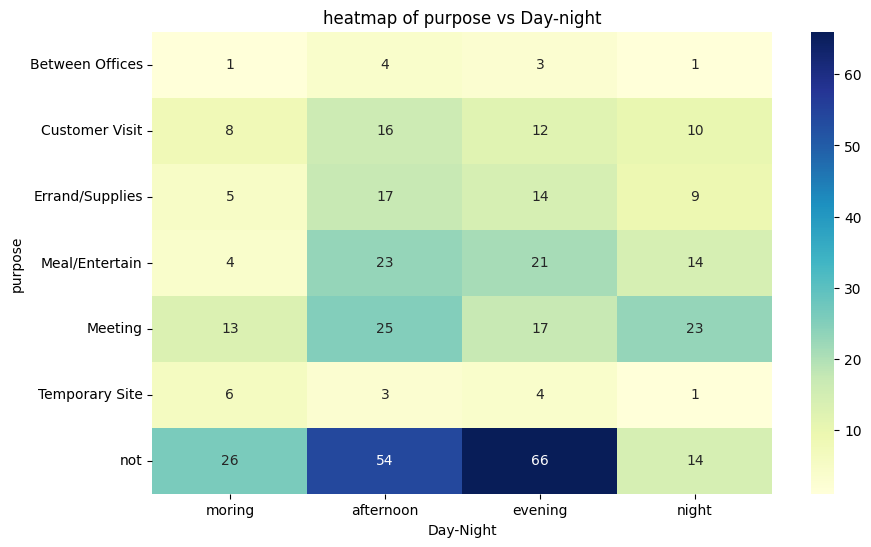

In [44]:
plt.figure(figsize=(10, 6))

heatmap_data = uber_df.groupby(['PURPOSE', 'day-night']).size().unstack()

sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')

plt.title('heatmap of purpose vs Day-night')
plt.xlabel('Day-Night')
plt.ylabel('purpose')

plt.show()


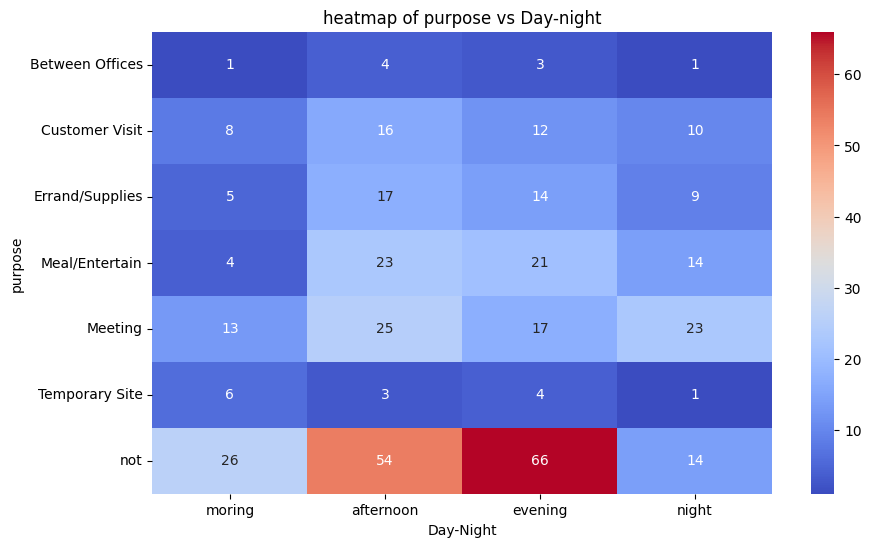

In [45]:
plt.figure(figsize=(10, 6))

heatmap_data = uber_df.groupby(['PURPOSE', 'day-night']).size().unstack()

sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='d')

plt.title('heatmap of purpose vs Day-night')
plt.xlabel('Day-Night')
plt.ylabel('purpose')

plt.show()


## imp

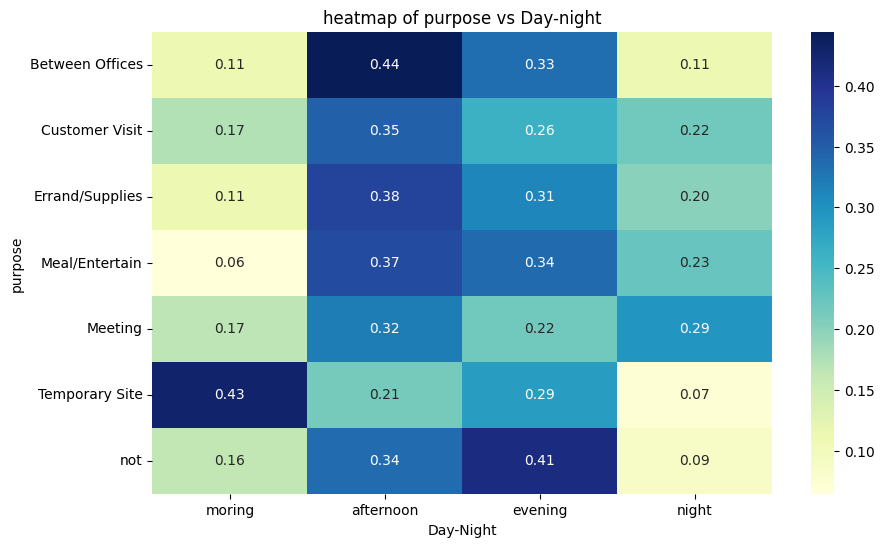

In [46]:
plt.figure(figsize=(10, 6))

heatmap_data = uber_df.groupby(['PURPOSE', 'day-night']).size().unstack()
heatmap_data= heatmap_data.div(heatmap_data.sum(axis = 1), axis = 0)

sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')

plt.title('heatmap of purpose vs Day-night')
plt.xlabel('Day-Night')
plt.ylabel('purpose')

plt.show()


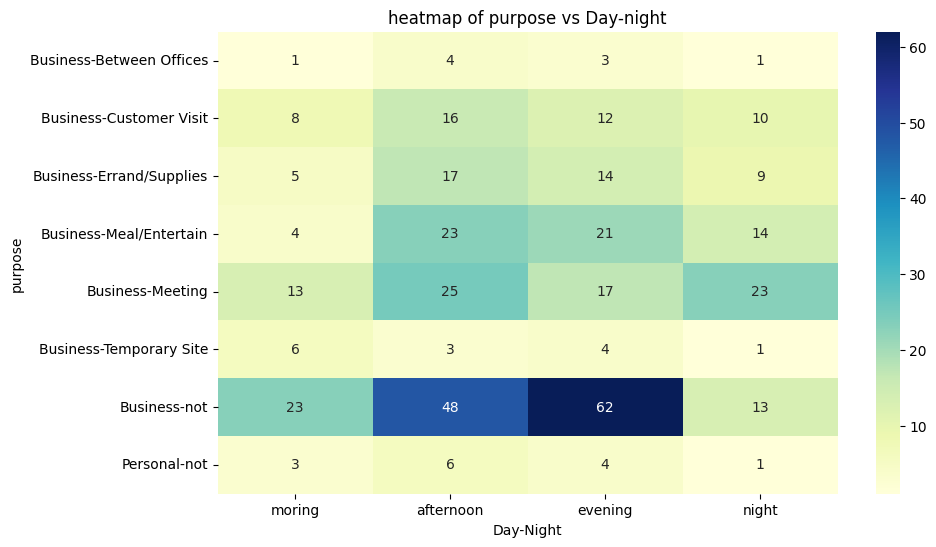

In [47]:
plt.figure(figsize=(10, 6))

heatmap_data = uber_df.groupby(['CATEGORY','PURPOSE','day-night']).size().unstack(level =-1)


sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')

plt.title('heatmap of purpose vs Day-night')
plt.xlabel('Day-Night')
plt.ylabel('purpose')

plt.show()


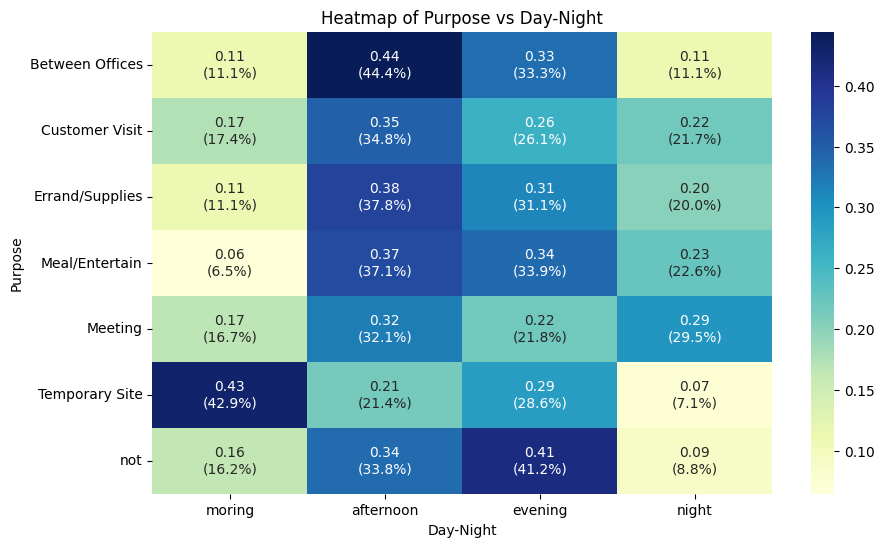

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

heatmap_data = (
    uber_df
    .groupby(['PURPOSE', 'day-night'])
    .size()
    .unstack(fill_value=0)
)

row_prop = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

# vectorized annotation matrix
annot_data = np.char.add(
    np.char.mod('%.2f', row_prop.values),
    np.char.add('\n(', np.char.add(np.char.mod('%.1f%%', row_prop.values * 100), ')'))
)

sns.heatmap(
    row_prop,
    annot=annot_data,
    cmap='YlGnBu',
    fmt=''
)

plt.title('Heatmap of Purpose vs Day-Night')
plt.xlabel('Day-Night')
plt.ylabel('Purpose')

plt.show()


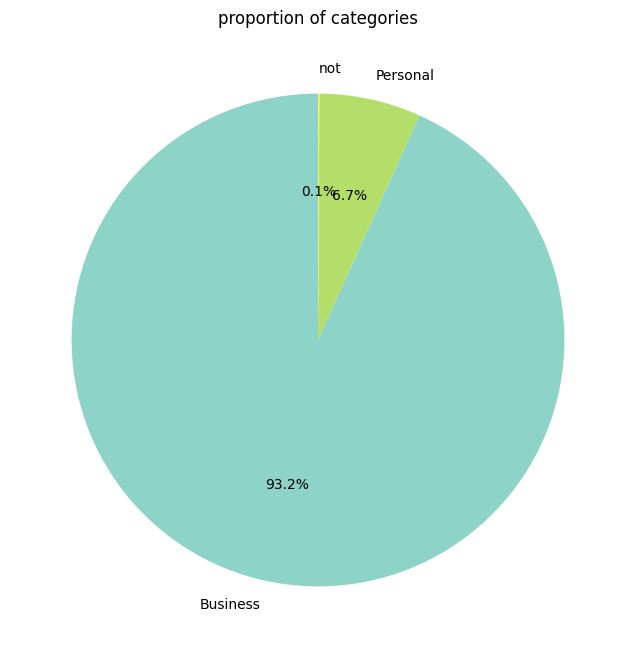

In [49]:
plt.figure(figsize =(8,8))
uber_df['CATEGORY'].value_counts().plot.pie(autopct = '%1.1f%%',startangle = 90,cmap ='Set3')
plt.title('proportion of categories')
plt.show()

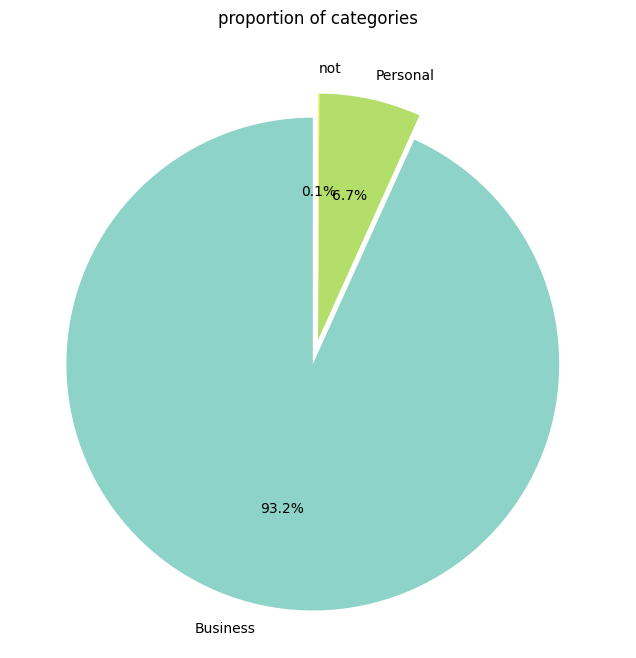

In [50]:
plt.figure(figsize =(8,8))
explode =[0.1 if cat =='Business' else 0 for cat in uber_df['CATEGORY'].value_counts().index]
uber_df['CATEGORY'].value_counts().plot.pie(autopct = '%1.1f%%',startangle = 90,explode = explode,  cmap ='Set3')
plt.title('proportion of categories')
plt.ylabel('')
plt.show()

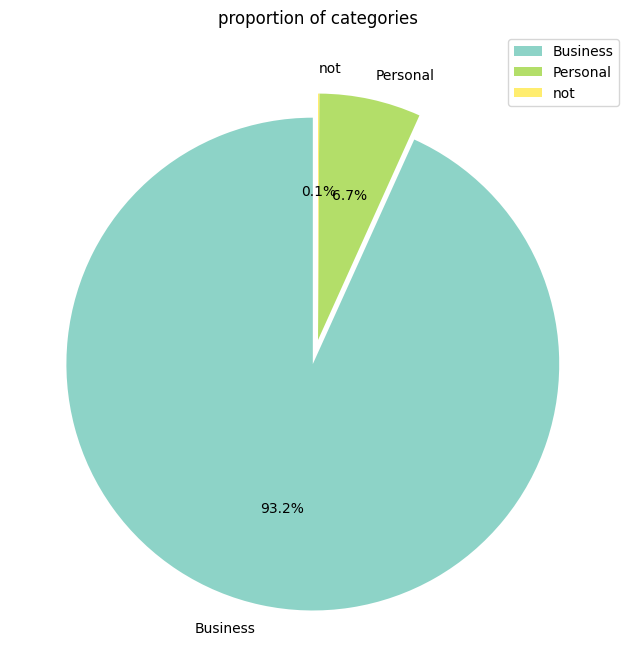

In [51]:
plt.figure(figsize =(8,8))
uber_df['CATEGORY'].value_counts().plot.pie(autopct = '%1.1f%%',startangle = 90,explode = explode,  cmap ='Set3')
plt.title('proportion of categories')
plt.ylabel('')
plt.legend(labels = uber_df['CATEGORY'].value_counts().index, loc = 'upper right')
plt.show()

In [52]:
##finding outlier
uber_df.describe()

,START_DATE,END_DATE,MILES,time
count,421,420,1155.000000,421.000000
mean,2016-07-01 12:31:09.976247,2016-07-01 12:11:10.142857,21.125108,14.988124
min,2016-01-01 21:11:00,2016-01-01 21:17:00,0.500000,0.000000
25%,2016-04-01 13:43:00,2016-03-27 15:10:00,2.900000,12.000000
50%,2016-07-04 18:23:00,2016-07-04 18:19:00,6.000000,15.000000
75%,2016-10-10 17:22:00,2016-10-10 17:39:15,10.400000,18.000000
max,2016-12-12 20:48:00,2016-12-12 20:57:00,12204.700000,23.000000
std,NaN,NaN,359.454497,4.668777


In [53]:
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,not,2016-01-02,1.0,moring
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,afternoon


In [54]:
q1 = uber_df['MILES'].quantile(0.75)
print(q1)

10.4


C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\1160192029.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = uber_df, x = 'day-night', y = 'MILES', palette = 'coolwarm' )


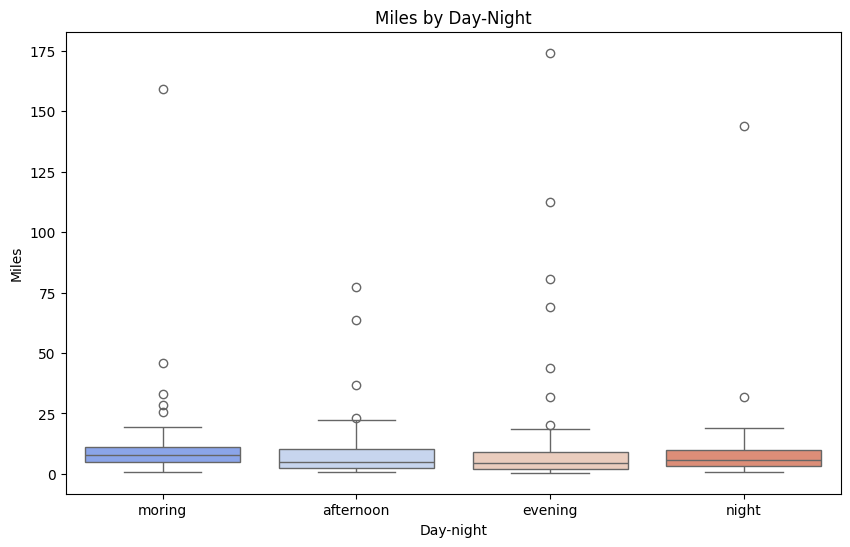

In [55]:
plt.figure(figsize = (10, 6) )
sns.boxplot(data = uber_df, x = 'day-night', y = 'MILES', palette = 'coolwarm' )
plt.title('Miles by Day-Night')
plt.xlabel('Day-night')
plt.ylabel('Miles')
plt.show()

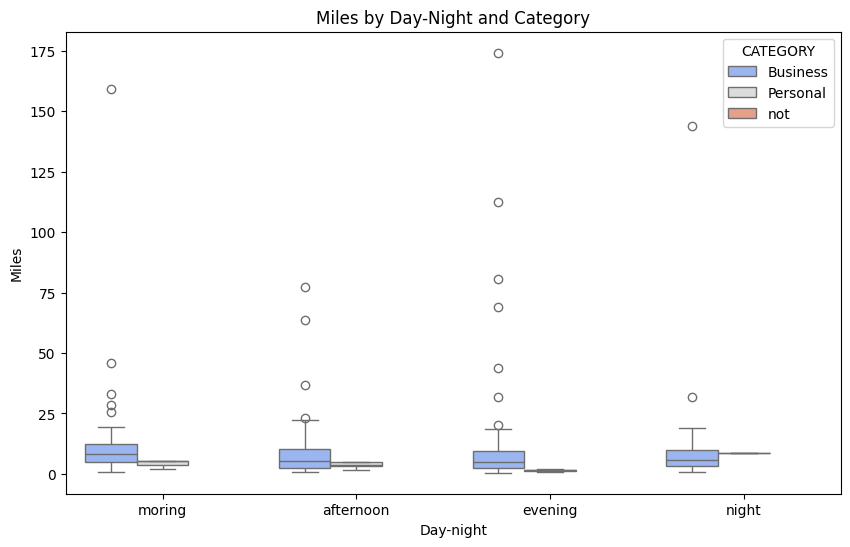

In [56]:
plt.figure(figsize= (10, 6))
sns.boxplot(data = uber_df, x = 'day-night', y = 'MILES', hue = 'CATEGORY', palette = 'coolwarm' )
plt.title('Miles by Day-Night and Category' )
plt.xlabel('Day-night')
plt.ylabel('Miles')
plt.show()

C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\1283126483.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = uber_df, x = 'day-night', y = 'MILES', palette = 'coolwarm' )


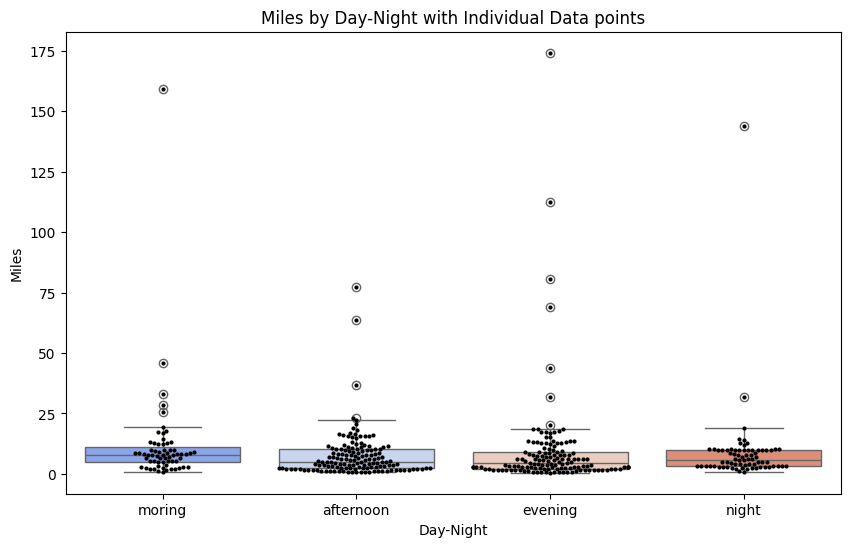

In [57]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = uber_df, x = 'day-night', y = 'MILES', palette = 'coolwarm' )
sns.swarmplot(data = uber_df, x ='day-night', y = 'MILES', color = 'black', size = 3)
plt.title('Miles by Day-Night with Individual Data points')
plt.xlabel('Day-Night')
plt.ylabel('Miles')
plt. show()

C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\2743161166.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = uber_df, x='PURPOSE',y ='MILES',palette = 'muted')


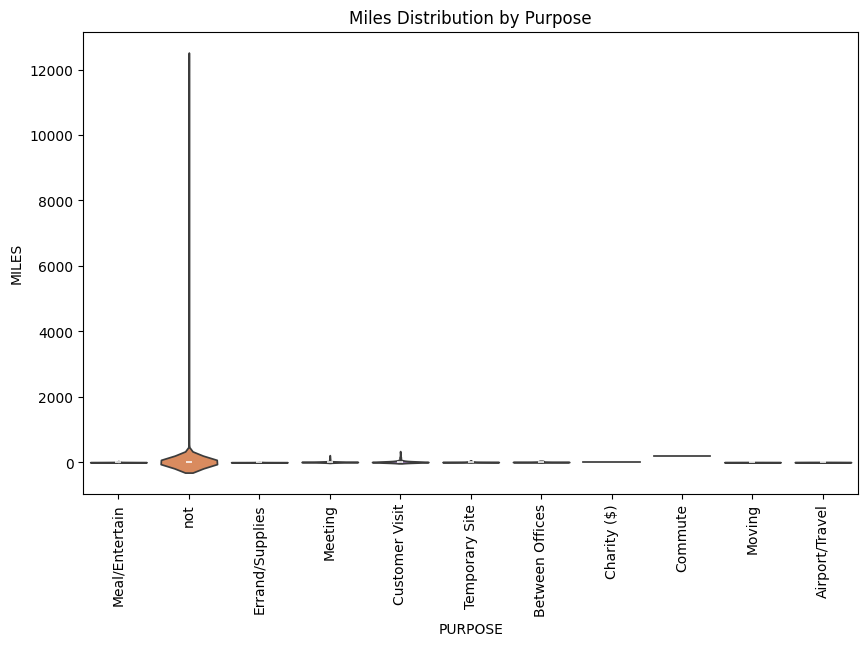

In [58]:
plt.figure(figsize =(10,6))
sns.violinplot(data = uber_df, x='PURPOSE',y ='MILES',palette = 'muted')
plt.xticks(rotation =90)
plt.title('Miles Distribution by Purpose')
plt.show()

C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\1045968549.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = uber_df, x='day-night',y ='MILES',palette = 'Blues')


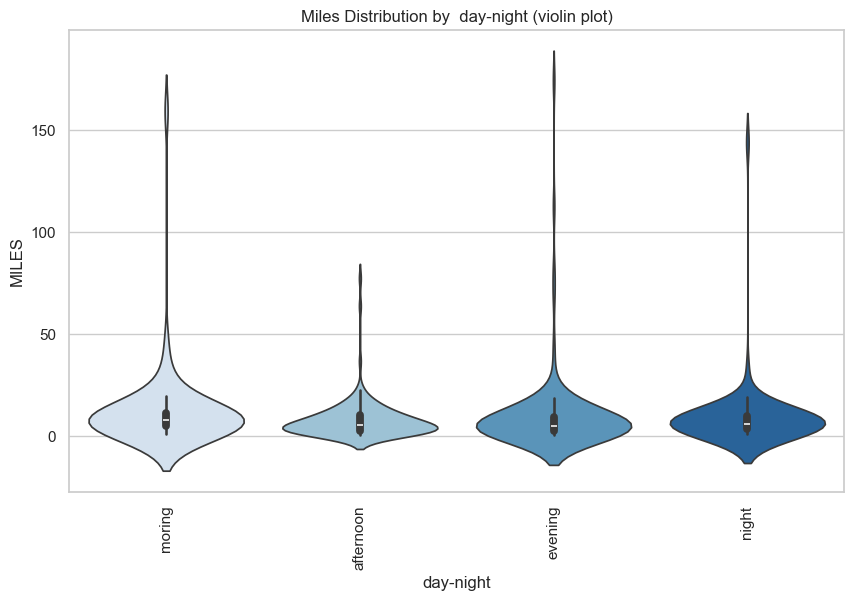

In [59]:
sns.set(style ='whitegrid')
plt.figure(figsize =(10,6))
sns.violinplot(data = uber_df, x='day-night',y ='MILES',palette = 'Blues')
plt.xticks(rotation =90)
plt.title('Miles Distribution by  day-night (violin plot)')
plt.ylabel
plt.show()

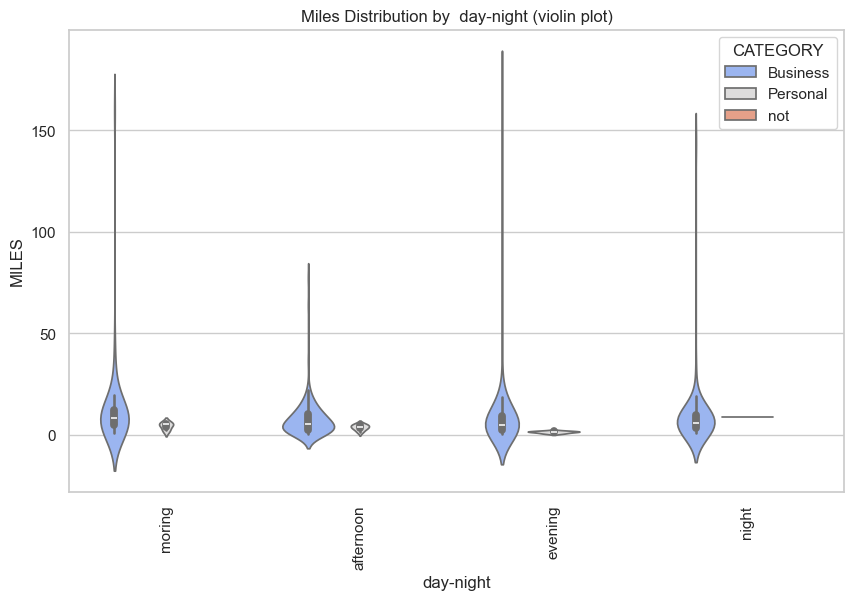

In [60]:
sns.set(style ='whitegrid')
plt.figure(figsize =(10,6))
sns.violinplot(data = uber_df, x='day-night',y ='MILES', hue ='CATEGORY',palette = 'coolwarm')
plt.xticks(rotation =90)
plt.title('Miles Distribution by  day-night (violin plot)')
plt.ylabel
plt.show()

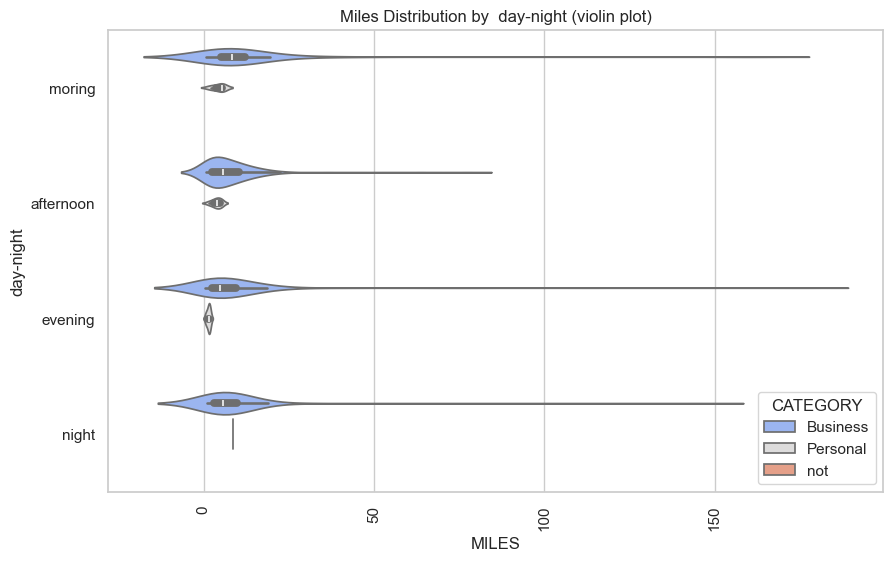

In [61]:
sns.set(style ='whitegrid')
plt.figure(figsize =(10,6))
sns.violinplot(data = uber_df, y='day-night',x='MILES', hue ='CATEGORY',palette = 'coolwarm')
plt.xticks(rotation =90)
plt.title('Miles Distribution by  day-night (violin plot)')
plt.ylabel
plt.show()

C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\1757108737.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = uber_df, y='day-night',x='MILES',  inner ='box',palette = 'coolwarm')


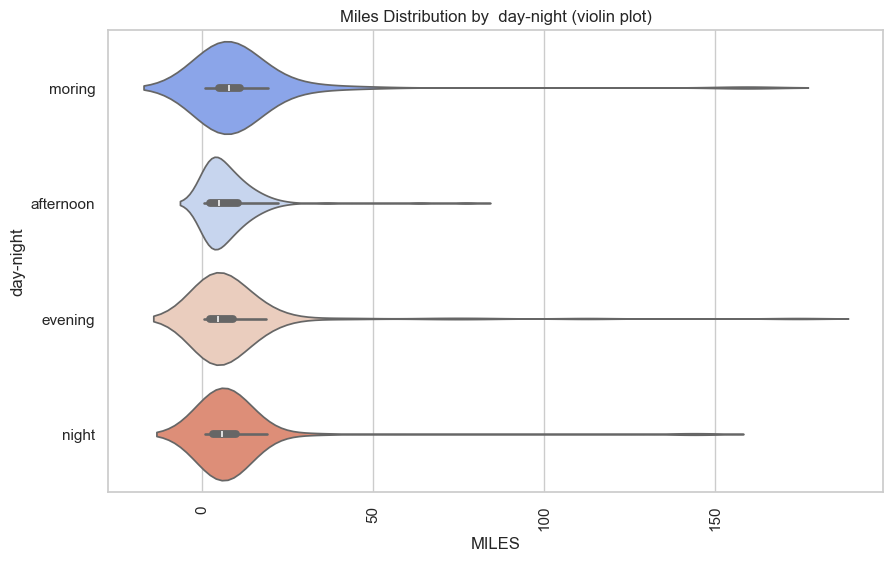

In [62]:
sns.set(style ='whitegrid')
plt.figure(figsize =(10,6))
sns.violinplot(data = uber_df, y='day-night',x='MILES',  inner ='box',palette = 'coolwarm')
plt.xticks(rotation =90)
plt.title('Miles Distribution by  day-night (violin plot)')
plt.ylabel
plt.show()

C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\2209512942.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = uber_df, x = 'PURPOSE',y= 'MILES',estimator= sum,ci=None,palette ='Set1')
C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\2209512942.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = uber_df, x = 'PURPOSE',y= 'MILES',estimator= sum,ci=None,palette ='Set1')


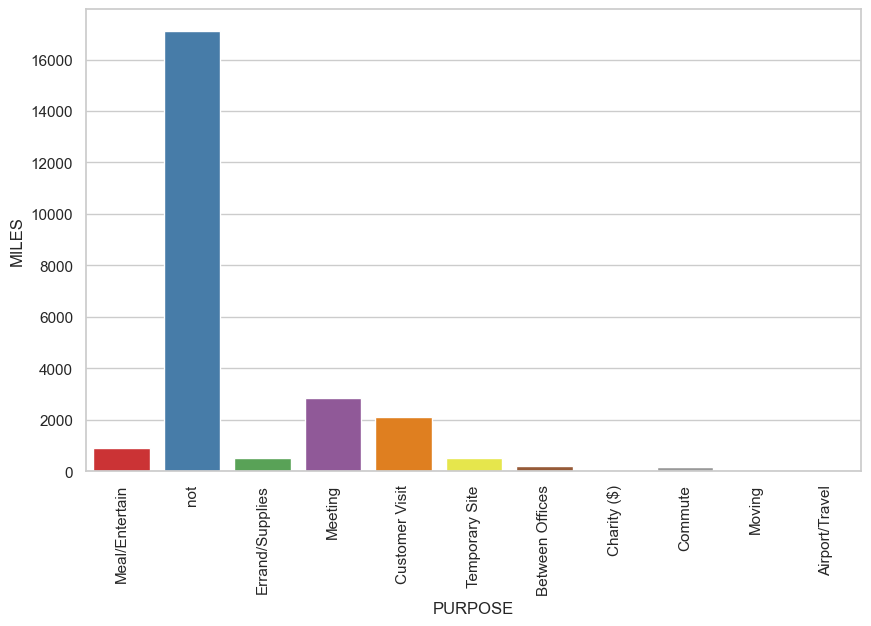

In [63]:
plt.figure(figsize=(10,6))
sns.barplot(data = uber_df, x = 'PURPOSE',y= 'MILES',estimator= sum,ci=None,palette ='Set1')
plt.xticks(rotation=90)
plt.show()


C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\3362783984.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = uber_df, x = 'PURPOSE', y = 'MILES', estimator = np.median, ci = None, palette = 'Set1')
C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\3362783984.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = uber_df, x = 'PURPOSE', y = 'MILES', estimator = np.median, ci = None, palette = 'Set1')


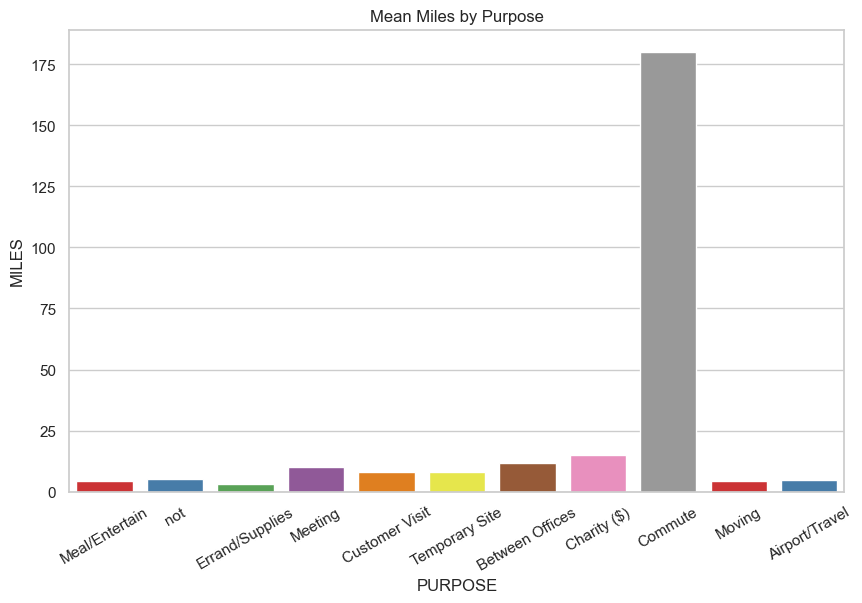

In [64]:
plt.figure(figsize = (10, 6))

sns.barplot(data = uber_df, x = 'PURPOSE', y = 'MILES', estimator = np.median, ci = None, palette = 'Set1')
plt.xticks(rotation = 30)
plt.title('Mean Miles by Purpose')
plt. show()

mod 10 

C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\2709154797.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = uber_df, x = 'PURPOSE', y = 'MILES', estimator = np.mean, ci = None, palette = 'Set2')
C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\2709154797.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = uber_df, x = 'PURPOSE', y = 'MILES', estimator = np.mean, ci = None, palette = 'Set2')


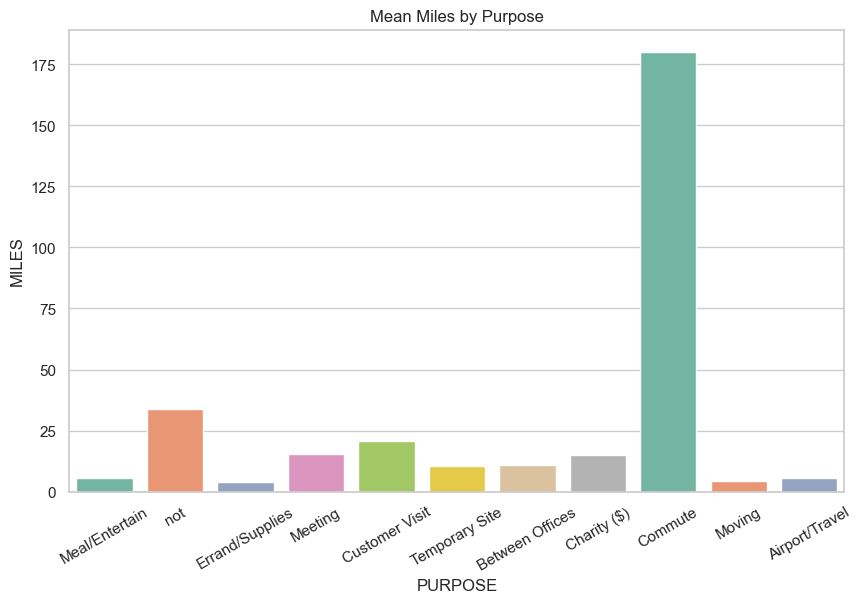

In [65]:
plt.figure(figsize = (10, 6))

sns.barplot(data = uber_df, x = 'PURPOSE', y = 'MILES', estimator = np.mean, ci = None, palette = 'Set2')
plt.xticks(rotation = 30)
plt.title('Mean Miles by Purpose')
plt. show()

C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\2248349215.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(data = uber_df, x = 'PURPOSE', y = 'MILES', estimator = sum , ci = 68 , palette = 'Blues')
C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\2248349215.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = uber_df, x = 'PURPOSE', y = 'MILES', estimator = sum , ci = 68 , palette = 'Blues')


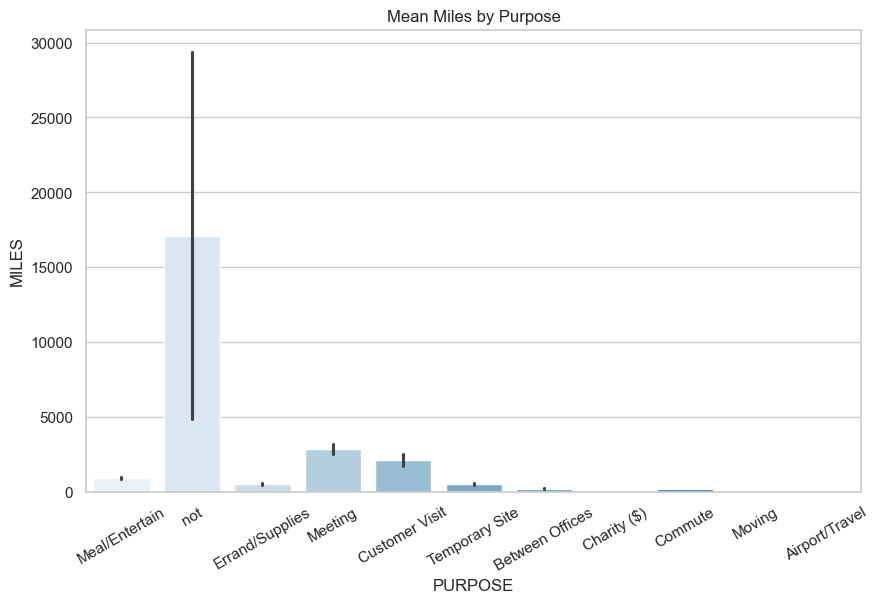

In [66]:
plt.figure(figsize = (10, 6))

sns.barplot(data = uber_df, x = 'PURPOSE', y = 'MILES', estimator = sum , ci = 68 , palette = 'Blues')
plt.xticks(rotation = 30)
plt.title('Mean Miles by Purpose')
plt. show()

C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\2103073023.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(data = uber_df, y = 'PURPOSE', x = 'MILES', estimator = sum , ci = 68 , palette = 'Blues')
C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\2103073023.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = uber_df, y = 'PURPOSE', x = 'MILES', estimator = sum , ci = 68 , palette = 'Blues')


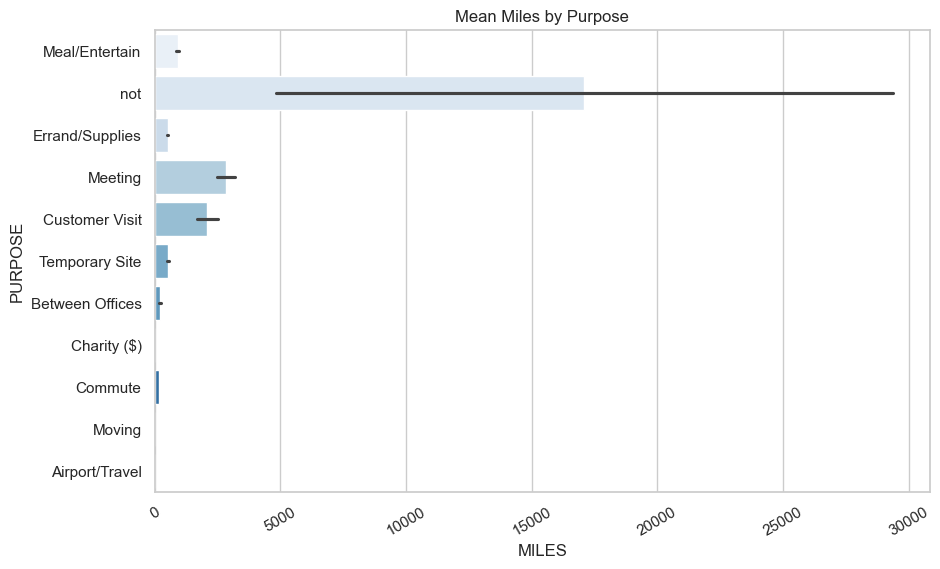

In [67]:
plt.figure(figsize = (10, 6))

sns.barplot(data = uber_df, y = 'PURPOSE', x = 'MILES', estimator = sum , ci = 68 , palette = 'Blues')
plt.xticks(rotation = 30)
plt.title('Mean Miles by Purpose')
plt. show()

C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\1343710027.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = uber_df, x = 'PURPOSE', palette = 'Blues' )


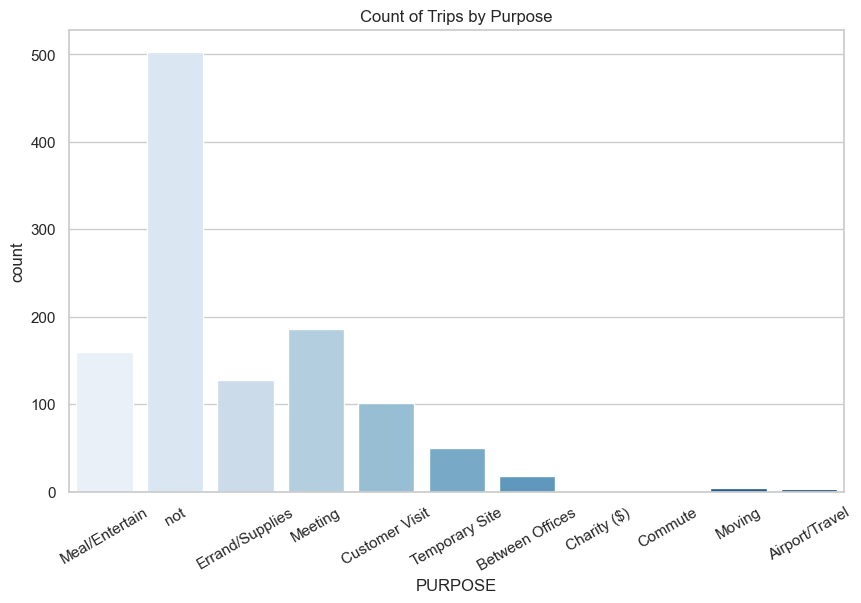

In [68]:
plt.figure(figsize = (10, 6))

sns.countplot(data = uber_df, x = 'PURPOSE', palette = 'Blues' )
plt.xticks(rotation = 30)
plt.title('Count of Trips by Purpose')
plt.show()

C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\1621828909.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = uber_df, x = 'PURPOSE', y = 'MILES', hue = 'day-night', estimator = sum, ci = None,)


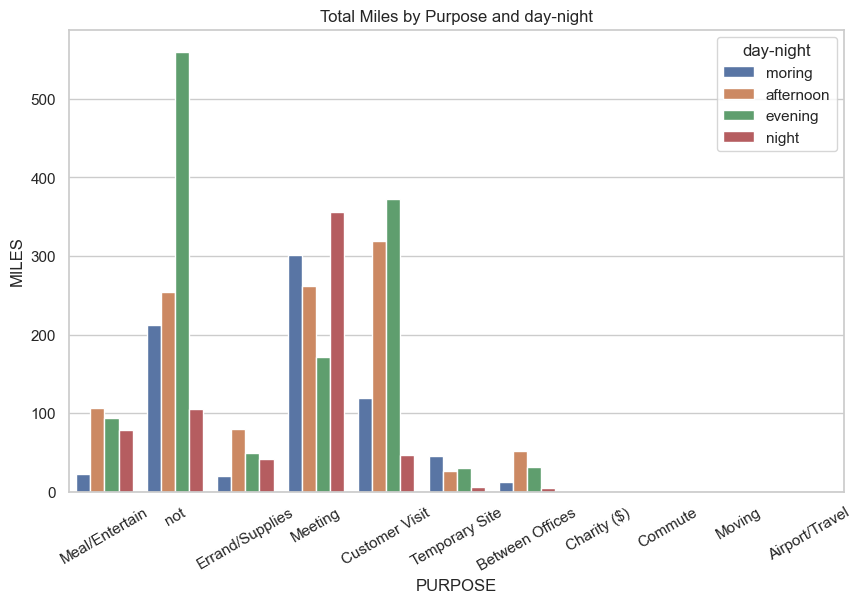

In [69]:
plt.figure(figsize = (10, 6))

sns.barplot(data = uber_df, x = 'PURPOSE', y = 'MILES', hue = 'day-night', estimator = sum, ci = None,)
plt.xticks(rotation = 30)
plt.title('Total Miles by Purpose and day-night')
plt.show()

C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\3289776503.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = uber_df, x = 'PURPOSE', y = 'MILES', estimator = sum, ci = None, palette = 'Set1')
C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\3289776503.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = uber_df, x = 'PURPOSE', y = 'MILES', estimator = sum, ci = None, palette = 'Set1')


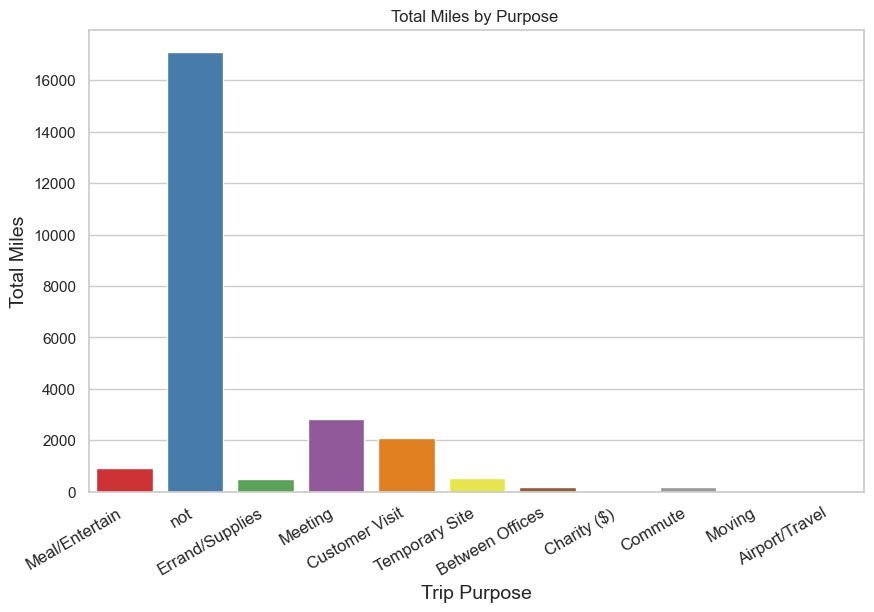

In [70]:
plt.figure(figsize= (10, 6))

sns.barplot(data = uber_df, x = 'PURPOSE', y = 'MILES', estimator = sum, ci = None, palette = 'Set1')
plt.xticks(rotation = 30, ha = 'right', fontsize = 12)
plt.xlabel('Trip Purpose', fontsize = 14)
plt.ylabel('Total Miles', fontsize = 14)
plt.title('Total Miles by Purpose ')
plt.show()

C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\2184721233.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\2184721233.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


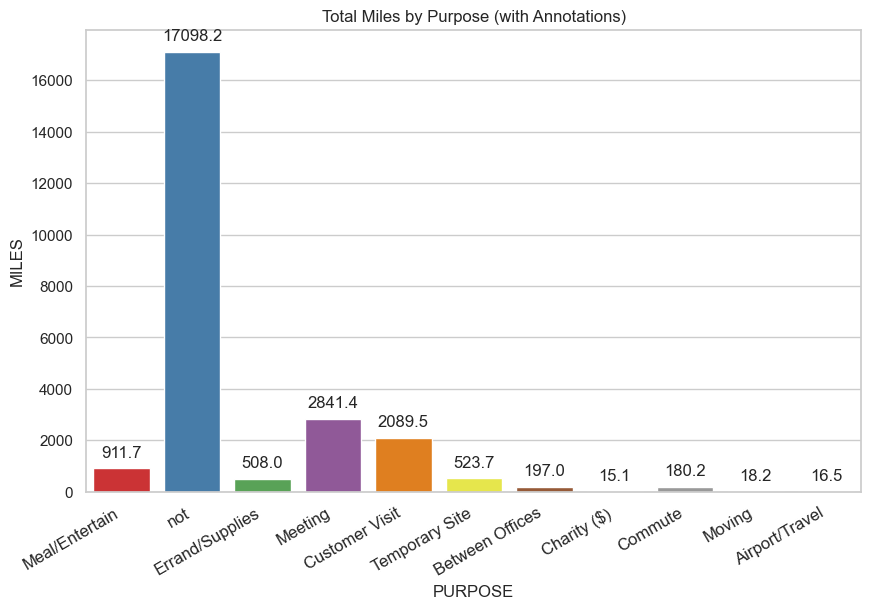

In [71]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=uber_df,
    x='PURPOSE',
    y='MILES',
    estimator=sum,
    ci=None,
    palette='Set1')

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        xytext=(0, 6),
        textcoords='offset points')

plt.xticks(rotation=30, ha='right', fontsize=12)
plt.title('Total Miles by Purpose (with Annotations)')

plt.show()


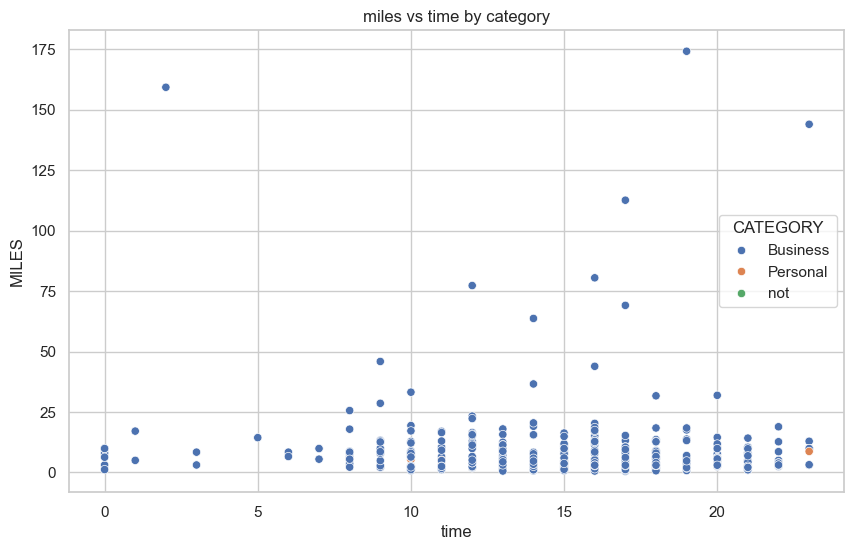

In [72]:
plt.figure(figsize = (10,6))
sns.scatterplot(data= uber_df,x='time', y='MILES',hue ='CATEGORY')
plt.title("miles vs time by category")
plt.show()


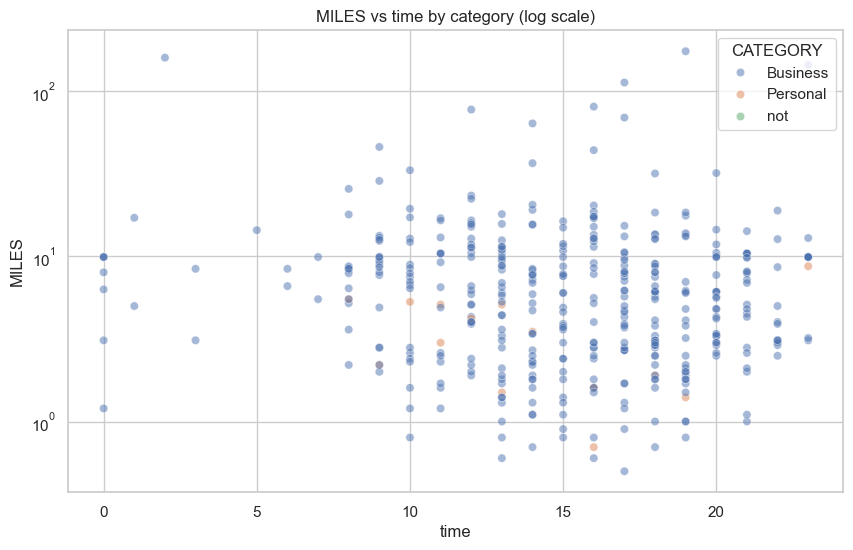

In [73]:
plt.figure(figsize =(10,6))
sns.scatterplot(data = uber_df, x ="time", y= 'MILES',hue = 'CATEGORY',alpha = 0.5)
plt.yscale('log')
plt.title("MILES vs time by category (log scale)")
plt.show()

## Creating function

In [74]:
def rounds(x):
    if x['START']==x['STOP']:
        return'yes'
    else:
        return 'NO'

In [75]:
uber_df['ROUND_TRIP'] = uber_df.apply(rounds,axis=1)

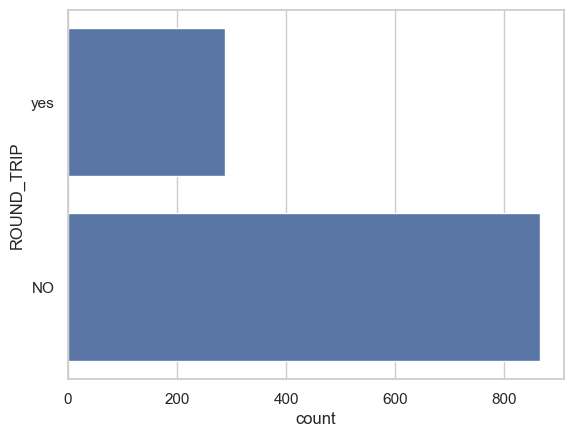

In [76]:
sns.countplot(uber_df['ROUND_TRIP'])
plt.show()

In [77]:
uber_df['MONTHS'] = pd.DatetimeIndex(uber_df['START_DATE']).month

In [78]:
uber_df['MONTHS']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1151    NaN
1152    NaN
1153    NaN
1154    NaN
1155    NaN
Name: MONTHS, Length: 1155, dtype: float64

In [79]:
dict = {1:'jan',2:'fed',3:'Mar',4:'Apr',5:'May',6:'jun',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'Dec'}

In [80]:
uber_df['MONTHS'] = uber_df['MONTHS'].map(dict)

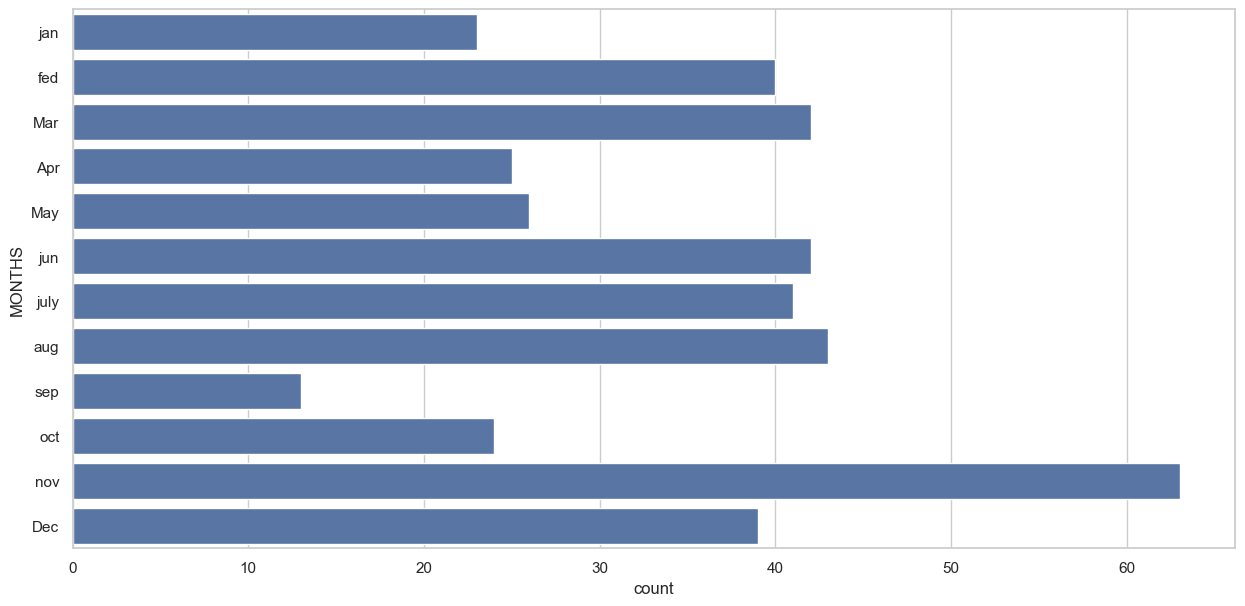

In [81]:
plt.figure(figsize=(15,7))
sns.countplot(uber_df['MONTHS'])
plt.show()

In [82]:
uber_df.groupby(['MONTHS','PURPOSE',])['ROUND_TRIP'].count()

MONTHS  PURPOSE        
Apr     Customer Visit      5
        Errand/Supplies     3
        Meal/Entertain      5
        Meeting             9
        not                 3
                           ..
nov     not                43
oct     Meeting             1
        Temporary Site      1
        not                22
sep     not                13
Name: ROUND_TRIP, Length: 64, dtype: int64

#### **MINUTES TAKE TO COVER  MILES?**

In [83]:
uber_df['MINUTES']= uber_df['END_DATE'] - uber_df['START_DATE']

In [84]:
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,ROUND_TRIP,MONTHS,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,night,yes,jan,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,not,2016-01-02,1.0,moring,yes,jan,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,night,yes,jan,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,evening,yes,jan,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,afternoon,NO,jan,0 days 01:07:00


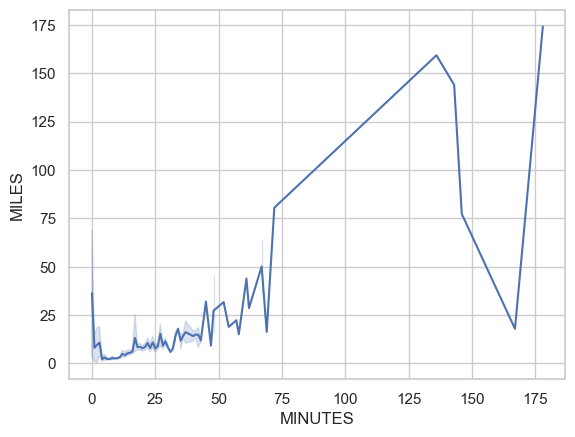

In [85]:
sns.lineplot(uber_df,x = uber_df['MINUTES'].dt.total_seconds()/60, y = uber_df['MILES'])
plt.show()

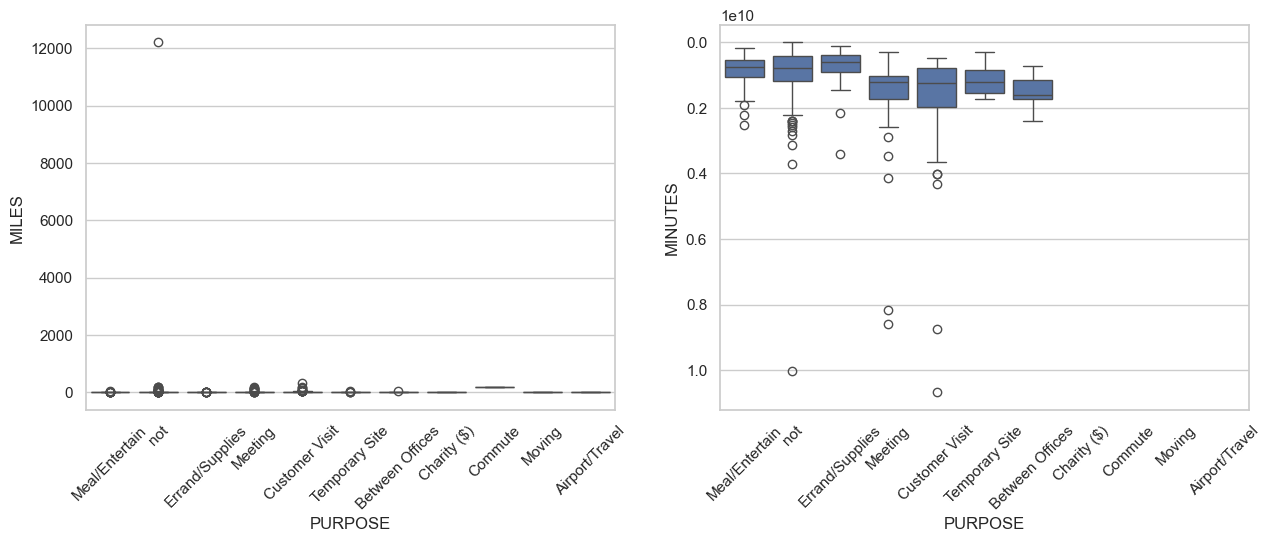

In [86]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data = uber_df, x = uber_df['PURPOSE'], y = uber_df['MILES'])
plt.xticks(rotation = 45)
plt.subplot(1,2,2)
sns.boxplot(data= uber_df, x = uber_df['PURPOSE'],y=uber_df['MINUTES'])
plt.xticks(rotation= 45)
plt.show()

##### FOR EACH PURPOSE WHAT IS THE MINIMUM MILES TRAVELLED , MEAN MILES TRAVELLED AND WHAT IS MAXIMUM MILES TRAVELLED?

In [87]:
pd.DataFrame({'Min':uber_df.groupby(['PURPOSE'])['MILES'].min(),
              'Mean': uber_df.groupby(['PURPOSE'])['MILES'].mean(),
              'Max': uber_df.groupby(['PURPOSE'])['MILES'].max()})


,Min,Mean,Max
PURPOSE,,,
Airport/Travel,4.1,5.500000,7.6
Between Offices,1.9,10.944444,39.2
Charity ($),15.1,15.100000,15.1
Commute,180.2,180.200000,180.2
Customer Visit,0.8,20.688119,310.3
Errand/Supplies,0.5,3.968750,22.3
Meal/Entertain,0.6,5.698125,36.5
Meeting,0.7,15.276344,201.0
Moving,3.3,4.550000,6.1


### ROUND TRIPS FOR EVERY PURPOSE EVERY MONTH

In [88]:
pd.set_option('display.max_rows',None)

In [89]:
pd.set_option('display.max_columns',None)

In [90]:
pd.set_option('display.max_colwidth',200)

In [91]:
pd.set_option('display.float_format','{:.2f}'.format)

In [92]:
pd.set_option('display.precision',3)


In [93]:
data = {'float':[1.23456,86.34560,12.65432]}
df = pd.DataFrame(data)
pd.options.display.float_format = '{:.1f}'.format

In [94]:
print(df)

   float
0    1.2
1   86.3
2   12.7


In [95]:
pd.set_option('display.expand_frame_repr',False)


In [96]:
print(df)

   float
0    1.2
1   86.3
2   12.7


In [97]:
pd.reset_option('display.large_repr')


In [98]:
print(df)

   float
0    1.2
1   86.3
2   12.7


In [99]:
uber_df.groupby(['MONTHS','PURPOSE'])['ROUND_TRIP'].count()

MONTHS  PURPOSE        
Apr     Customer Visit      5
        Errand/Supplies     3
        Meal/Entertain      5
        Meeting             9
        not                 3
Dec     Customer Visit     10
        Errand/Supplies    10
        Meal/Entertain     10
        Meeting             6
        Temporary Site      1
        not                 2
Mar     Between Offices     2
        Customer Visit      5
        Errand/Supplies     3
        Meal/Entertain     10
        Meeting             9
        Temporary Site      1
        not                12
May     Between Offices     2
        Customer Visit      6
        Errand/Supplies     4
        Meal/Entertain      7
        Meeting             6
        not                 1
aug     Customer Visit      3
        Meal/Entertain      1
        Meeting             1
        not                38
fed     Between Offices     1
        Customer Visit      5
        Errand/Supplies     5
        Meal/Entertain     11
        Meeting 

In [100]:
data = {f'column_{i}':list(range(5)) for i in range(15)}
df = pd.DataFrame(data)
df

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [101]:
pd.set_option('display.expand_frame_repr',False)

In [102]:
print(df)

   column_0  column_1  column_2  column_3  column_4  column_5  column_6  column_7  column_8  column_9  column_10  column_11  column_12  column_13  column_14
0         0         0         0         0         0         0         0         0         0         0          0          0          0          0          0
1         1         1         1         1         1         1         1         1         1         1          1          1          1          1          1
2         2         2         2         2         2         2         2         2         2         2          2          2          2          2          2
3         3         3         3         3         3         3         3         3         3         3          3          3          3          3          3
4         4         4         4         4         4         4         4         4         4         4          4          4          4          4          4


### Are there more riders on weekdays or weekends? 

C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\2157868806.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = uber_df , x= 'WEEKDAYS', order =['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],palette = 'Set3')


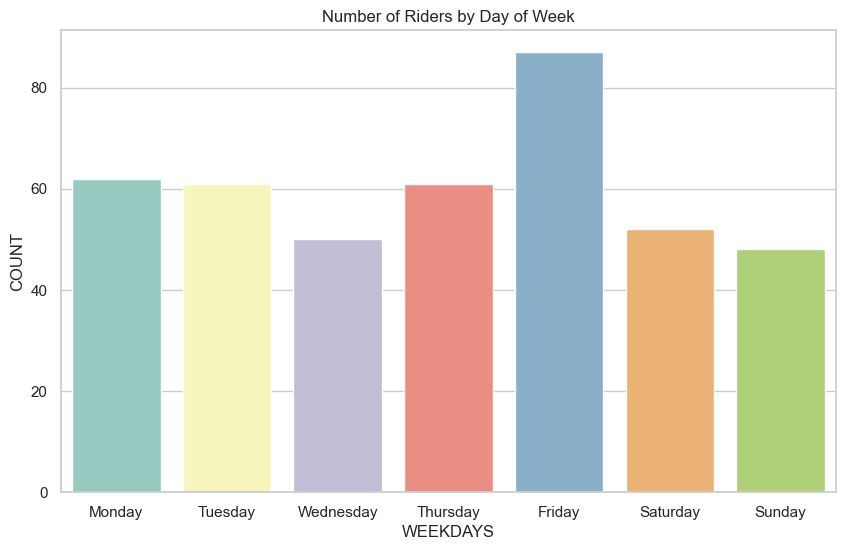

In [103]:
uber_df['WEEKDAYS']= uber_df['START_DATE'].dt.day_name()
plt.figure(figsize =(10,6))
sns.countplot(data = uber_df , x= 'WEEKDAYS', order =['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],palette = 'Set3')
plt.title('Number of Riders by Day of Week')
plt.xlabel('WEEKDAYS')
plt.ylabel('COUNT')
plt.show()

### How many riders were round trips 

In [104]:
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,ROUND_TRIP,MONTHS,MINUTES,WEEKDAYS
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,night,yes,jan,0 days 00:06:00,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,not,2016-01-02,1.0,moring,yes,jan,0 days 00:12:00,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,night,yes,jan,0 days 00:13:00,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,evening,yes,jan,0 days 00:14:00,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,afternoon,NO,jan,0 days 01:07:00,Wednesday


In [105]:
round_trip_counts = uber_df['ROUND_TRIP'].value_counts()

Text(0.5, 1.0, 'proportion of Round Trips')

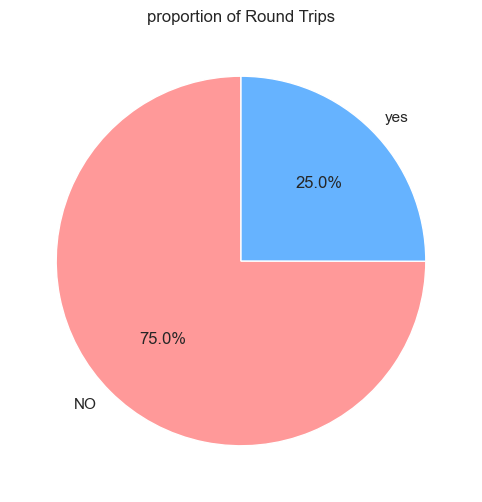

In [106]:
plt.figure(figsize= (10,6))
round_trip_counts.plot(kind = 'pie',autopct = '%1.1f%%', startangle = 90 , colors = ['#ff9999','#66b3ff'])
plt.title("proportion of Round Trips")


### what is the total miles traveled in each category (CATEGORY?)

In [107]:
total_miles_by_category = uber_df.groupby('CATEGORY')['MILES'].sum()
print(total_miles_by_category)

CATEGORY
Business   11477.1
Personal     717.7
not        12204.7
Name: MILES, dtype: float64


CATEGORY
Business   11477.1
Personal     717.7
not        12204.7
Name: MILES, dtype: float64


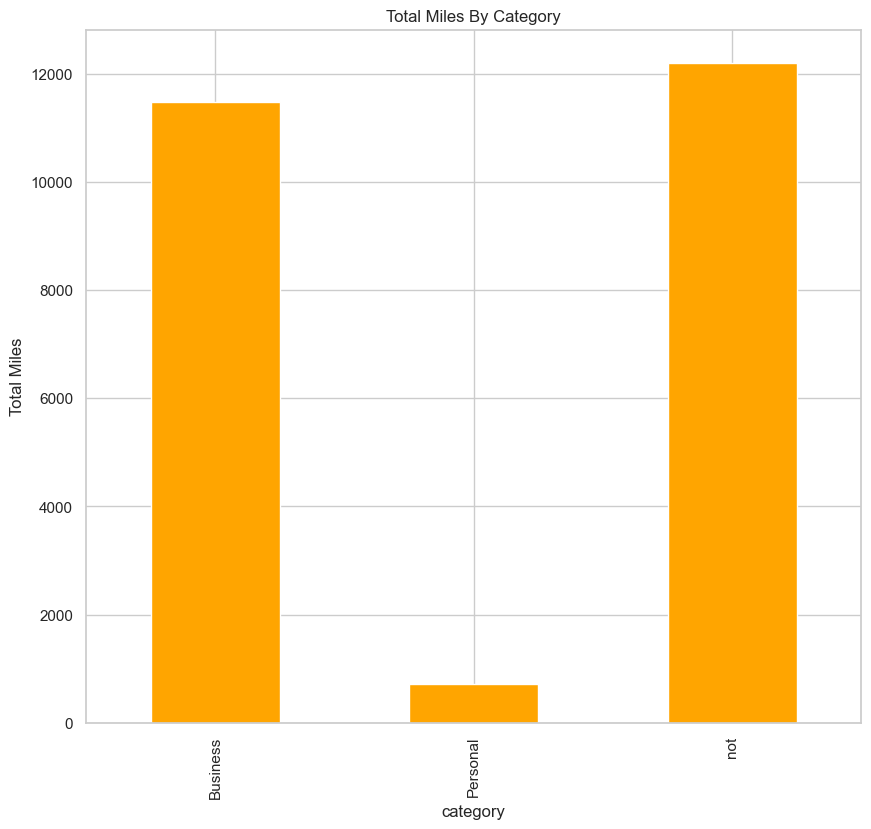

In [108]:
total_miles_by_category = uber_df.groupby('CATEGORY')['MILES'].sum()
print(total_miles_by_category)
plt.figure(figsize = (10,9))
total_miles_by_category.plot(kind = 'bar' , color= 'orange')
plt.title('Total Miles By Category')
plt.xlabel('category')
plt.ylabel('Total Miles')
plt.show()

C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\447944627.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = uber_df, x='MONTHS', palette = 'Set1')


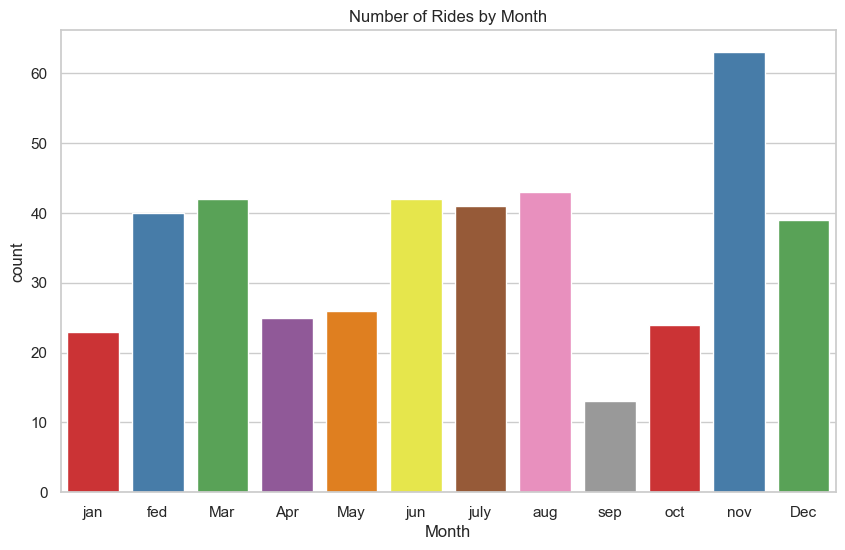

In [109]:
plt.figure(figsize =(10,6))
sns.countplot(data = uber_df, x='MONTHS', palette = 'Set1')
plt.title('Number of Rides by Month')
plt.xlabel('Month')
plt.ylabel('count')
plt.show()

In [110]:
top_location = uber_df['START'].value_counts().head(10)
print(top_location)



START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               36
Lahore               36
Raleigh              28
Kar?chi              27
Apex                 17
Name: count, dtype: int64


In [111]:
##replace karachi name into proter sp
uber_df['STARTS']=uber_df['START'].replace('Kar?chi','karachi')

In [112]:
uber_df['STARTS'].value_counts().head(10)

STARTS
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               36
Lahore               36
Raleigh              28
karachi              27
Apex                 17
Name: count, dtype: int64

## imp

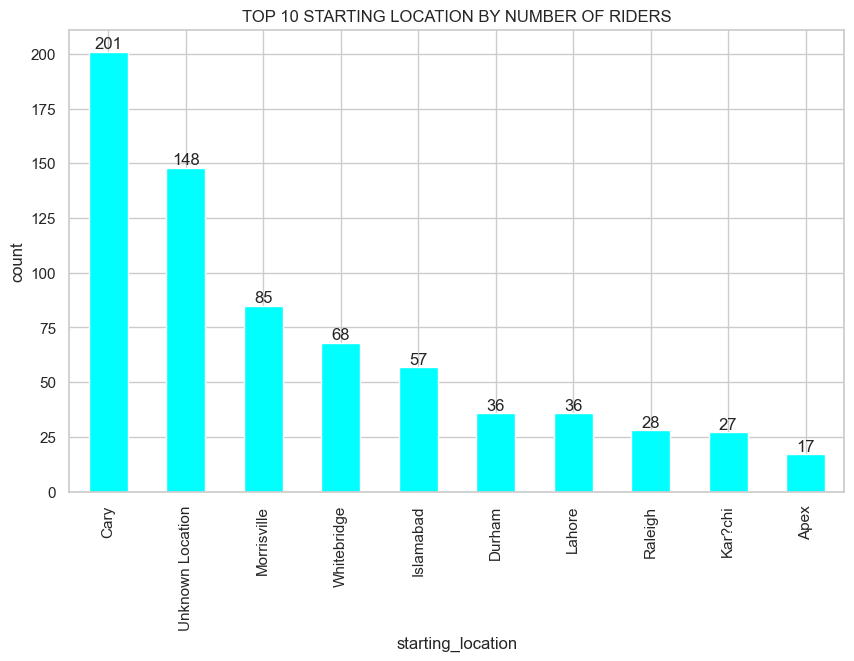

In [113]:
plt.figure(figsize =(10,6))
ax = top_location.plot(kind = 'bar',color ='cyan')
plt.title('TOP 10 STARTING LOCATION BY NUMBER OF RIDERS')
plt.xlabel('starting_location')
plt.ylabel('count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2, p.get_height()), ha ='center',va ='bottom')

plt.show()

### what are the busiest time of the day for rides(time 1)?


In [114]:
sorted_by_time = uber_df['time'].value_counts().sort_values(ascending = False)



C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\510631298.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = uber_df, x = 'time', palette = 'viridis')


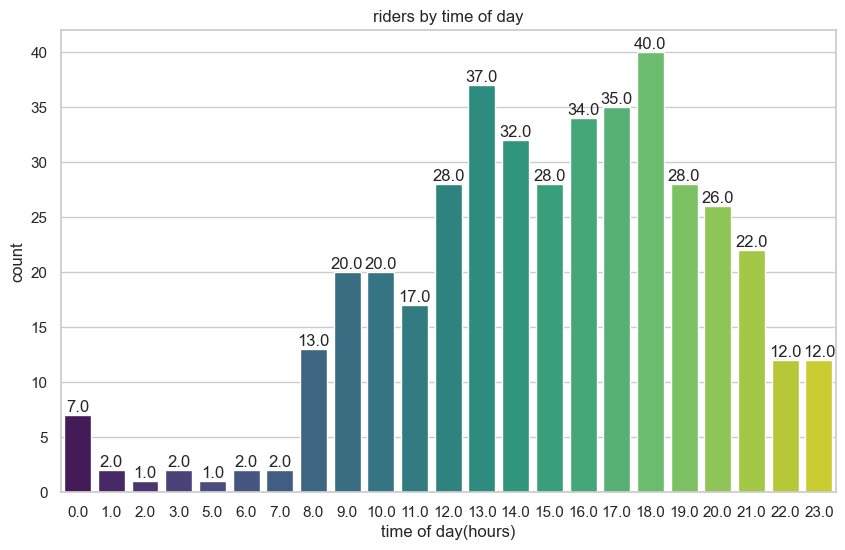

In [115]:
plt.figure(figsize =(10,6))

ax = sns.countplot(data = uber_df, x = 'time', palette = 'viridis')

plt.title('riders by time of day')
plt.xlabel('time of day(hours)')
plt.ylabel('count')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2, p.get_height()), ha ='center',va ='bottom')
plt.show()

## imp

C:\Users\mithu\AppData\Local\Temp\ipykernel_21644\4197294411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = uber_df, x = 'time', palette = 'viridis' , order = sorted_by_time.index )


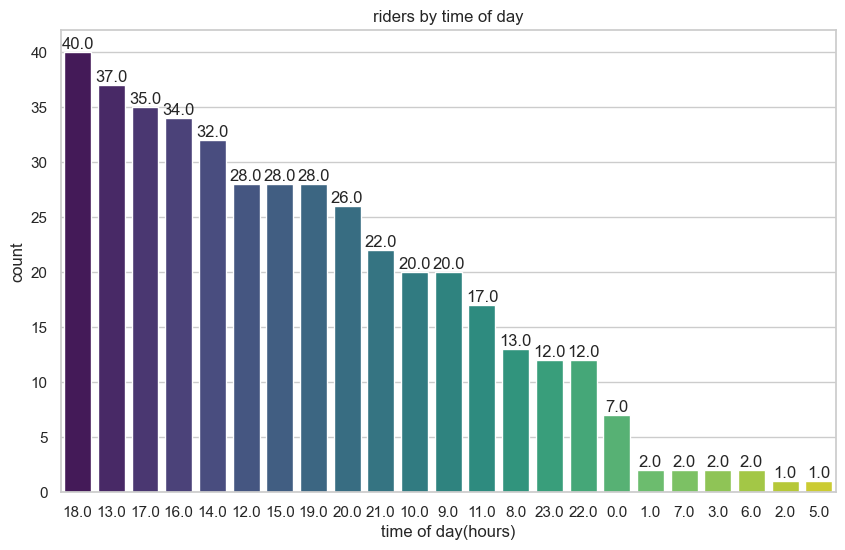

In [116]:
plt.figure(figsize =(10,6))

ax = sns.countplot(data = uber_df, x = 'time', palette = 'viridis' , order = sorted_by_time.index )

plt.title('riders by time of day')
plt.xlabel('time of day(hours)')
plt.ylabel('count')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2, p.get_height()), ha ='center',va ='bottom')
plt.show()

In [117]:
uber_df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'date', 'time', 'day-night', 'ROUND_TRIP', 'MONTHS',
       'MINUTES', 'WEEKDAYS', 'STARTS'],
      dtype='str')

### what are the top 5 most common purposes (PURPOSE) for ride?

In [118]:
uber_df['PURPOSE'].value_counts().head(10)

PURPOSE
not                503
Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Name: count, dtype: int64

### what is the logest and shortest ride duriation for each category (Business vs porsonal)?

In [119]:
uber_df['ride_duration'] = (uber_df['END_DATE']- uber_df['START_DATE']).dt.total_seconds()/60

In [120]:
uber_df.groupby('CATEGORY')['ride_duration'].agg(['min','max'])

,min,max
CATEGORY,,
Business,0.0,178.0
Personal,4.0,16.0
not,NaN,NaN


### What is the total number of riders per day of week?

In [121]:
miles_by_month = uber_df.groupby('MONTHS')['MILES'].sum()
most_miles_months = miles_by_month.idxmax()
miles_by_month,most_miles_months

(MONTHS
 Apr    821.8
 Dec    198.2
 Mar    259.3
 May    239.0
 aug    261.4
 fed    309.0
 jan    183.6
 july   341.8
 jun    275.5
 nov    400.6
 oct    361.5
 sep    172.2
 Name: MILES, dtype: float64,
 'Apr')

### what is the average numer of riders per day for each day of the week

In [122]:
uber_df['WEEKDAYS']=  uber_df['START_DATE'].dt.day_name


In [123]:
rides_by_weekday = uber_df.groupby('WEEKDAYS').size().mean()
rides_by_weekday

np.float64(1155.0)

In [124]:
avg_rides_by_weekday = rides_by_weekday/uber_df['WEEKDAYS'].nunique()
print(avg_rides_by_weekday)

1155.0


### which STRARTnlocation have the most ROUND_trip rides and many?

In [125]:
round_trip_location = uber_df[uber_df['ROUND_TRIP']== 'yes'].groupby('START').size().sort_values(ascending = False).head(5)
round_trip_location

START
Unknown Location    86
Cary                53
Lahore              27
Islamabad           25
Kar?chi             20
dtype: int64

### What is the average ride distance (MILES*) for rides that happen during different times of the day (day-night)?

In [126]:
avg_miles_day_night = uber_df.groupby('day-night')['MILES'].mean()
avg_miles_day_night

day-night
moring      11.6
afternoon    7.7
evening      9.5
night        8.9
Name: MILES, dtype: float64

### how many riders start and stop in the same location (start == stop) and how many miles do these riders cover on average?



In [127]:
same_location_ride = uber_df[uber_df['START'] == uber_df['STOP']]
num_same_location_ride = same_location_ride.shape[0]
avg_miles_same_location = same_location_ride['MILES'].mean()


#### Which PURPOSE* has the highest average ride duration, and what is the average duration for that purpose?

In [128]:
uber_df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'date', 'time', 'day-night', 'ROUND_TRIP', 'MONTHS',
       'MINUTES', 'WEEKDAYS', 'STARTS', 'ride_duration'],
      dtype='str')

In [129]:
uber_df.groupby('PURPOSE')['ride_duration'].mean()

PURPOSE
Airport/Travel     NaN
Between Offices   25.7
Charity ($)        NaN
Commute            NaN
Customer Visit    31.6
Errand/Supplies   12.4
Meal/Entertain    14.4
Meeting           25.7
Moving             NaN
Temporary Site    18.7
not               16.2
Name: ride_duration, dtype: float64

In [130]:
valid_uber_df =  uber_df.dropna(subset = ['PURPOSE','ride_duration'])
avg_duration_by_purpose = valid_uber_df.groupby('PURPOSE')['ride_duration'].mean()
print(avg_duration_by_purpose )

PURPOSE
Between Offices   25.7
Customer Visit    31.6
Errand/Supplies   12.4
Meal/Entertain    14.4
Meeting           25.7
Temporary Site    18.7
not               16.2
Name: ride_duration, dtype: float64


In [131]:

uber_df['ride_duration'] = uber_df['ride_duration'].fillna(uber_df['ride_duration'].median())
avg_duration_by_purpose = (
    uber_df.groupby('PURPOSE')['ride_duration']
    .mean())

In [132]:
avg_duration_by_purpose

PURPOSE
Airport/Travel    15.0
Between Offices   20.3
Charity ($)       15.0
Commute           15.0
Customer Visit    22.6
Errand/Supplies   14.0
Meal/Entertain    14.8
Meeting           19.7
Moving            15.0
Temporary Site    16.0
not               15.4
Name: ride_duration, dtype: float64

#### What is the most common combination of START* and STOP* locations, and how many times does this combination appear in the dataset?

In [133]:
uber_df.groupby(['START','STOP']).size().sort_values(ascending = False).head(2)

START             STOP            
Unknown Location  Unknown Location    86
Morrisville       Cary                75
dtype: int64

#### What is the average time difference between the start of the first ride and the start of the next ride for each unique day?

In [134]:
uber_df = uber_df.sort_values('START_DATE')
uber_df['next_ride'] = uber_df.groupby('date')['START_DATE'].shift(-1)
uber_df['time_diff'] =(uber_df['next_ride']- uber_df['START_DATE']).dt.total_seconds()/60
avg_time_diff = uber_df.groupby('date')['time_diff'].mean().dropna()
avg_time_diff

date
2016-01-02   1140.0
2016-01-06     84.0
2016-01-10    166.8
2016-01-11    111.7
2016-01-12     41.8
2016-02-01     70.5
2016-02-02     47.0
2016-02-04    119.3
2016-02-05     95.0
2016-02-06     94.0
2016-02-07     71.0
2016-02-08     63.0
2016-02-09    114.0
2016-02-11     82.7
2016-02-12     86.4
2016-03-01    160.0
2016-03-03     94.2
2016-03-04     76.6
2016-03-05     67.8
2016-03-07     92.2
2016-03-08     47.5
2016-03-10    254.0
2016-03-11    143.5
2016-03-12    554.0
2016-04-01     63.0
2016-04-02    172.6
2016-04-07     85.0
2016-04-08     53.8
2016-04-12     66.8
2016-05-01    133.2
2016-05-02     83.0
2016-05-04    141.0
2016-05-05     75.5
2016-05-06    345.5
2016-05-09    269.0
2016-05-10    496.0
2016-05-11    792.0
2016-06-01    171.0
2016-06-03    113.0
2016-06-05    117.8
2016-06-06     95.6
2016-06-07    119.0
2016-06-08    101.1
2016-06-10    257.0
2016-06-11     97.8
2016-06-12     62.5
2016-07-01    357.0
2016-07-02    210.0
2016-07-03    586.0
2016-07-04    3

In [ ]:
pip install statsmodels

  Using cached statsmodels-0.14.6-cp314-cp314-win_amd64.whl.metadata (9.8 kB)
Using cached statsmodels-0.14.6-cp314-cp314-win_amd64.whl (9.6 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


SIMPLE DEMAND FORECAST - RESULTS

 Historical Data Summary:
   • Total days: 347
   • Average rides/day: 1.2
   • Max rides/day: 10
   • Min rides/day: 0
   • Std Dev: 2.0

 Trend Analysis (Last 30 days):
   • Slope: +0.16 rides/day
  Direction: INCREASING

 30-Day Forecast:
   • Average: 5.9 rides/day
   • Min: 4, Max: 8

   First 10 days:
      Day  1 (2016-12-13):    3.6 rides
      Day  2 (2016-12-14):    3.8 rides
      Day  3 (2016-12-15):    3.9 rides
      Day  4 (2016-12-16):    4.1 rides
      Day  5 (2016-12-17):    4.2 rides
      Day  6 (2016-12-18):    4.4 rides
      Day  7 (2016-12-19):    4.6 rides
      Day  8 (2016-12-20):    4.7 rides
      Day  9 (2016-12-21):    4.9 rides
      Day 10 (2016-12-22):    5.1 rides


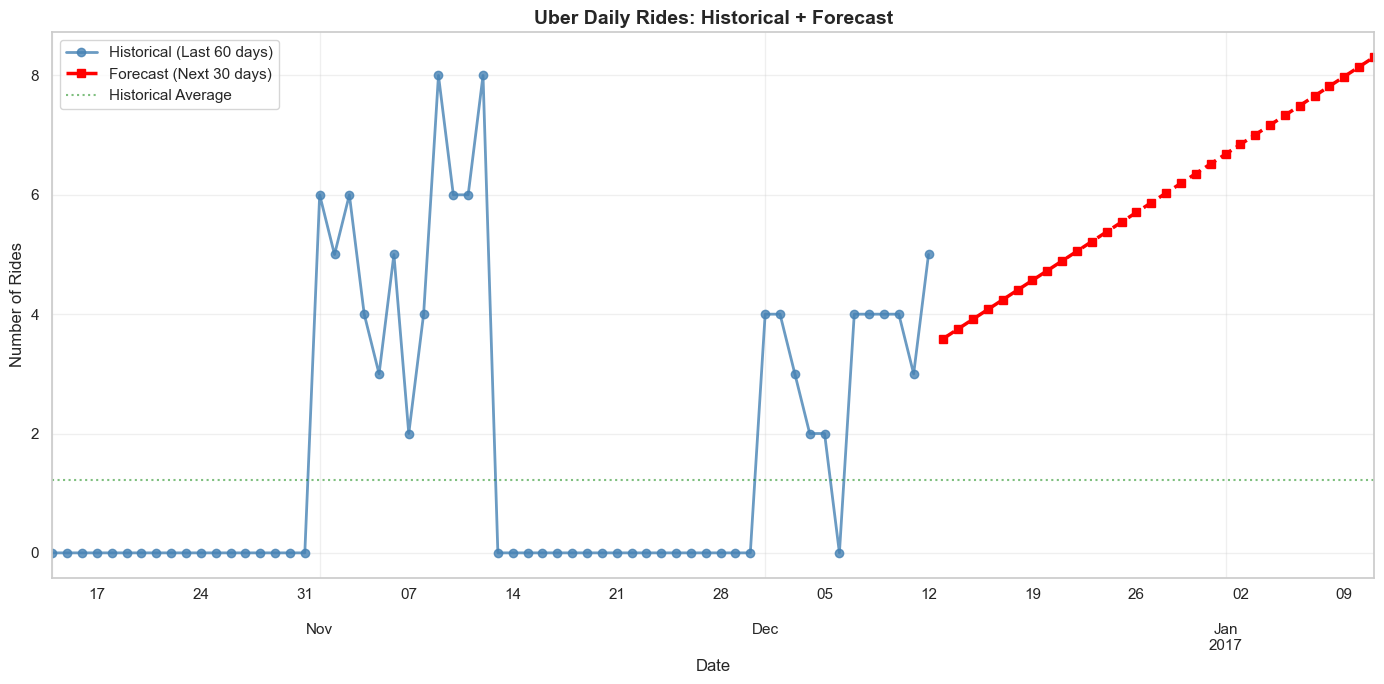


 Forecast complete!


In [142]:
# === PRINT & DISPLAY FORECAST ===

print("=" * 60)
print("SIMPLE DEMAND FORECAST - RESULTS")
print("=" * 60)

# Prepare data
df_fc = uber_df.copy()
df_fc['START_DATE'] = pd.to_datetime(df_fc['START_DATE'], errors='coerce')
df_fc = df_fc.dropna(subset=['START_DATE'])

# Aggregate by day
df_fc_idx = df_fc.set_index('START_DATE')
daily = df_fc_idx.resample('D').size()

print(f"\n Historical Data Summary:")
print(f"   • Total days: {len(daily)}")
print(f"   • Average rides/day: {daily.mean():.1f}")
print(f"   • Max rides/day: {daily.max():.0f}")
print(f"   • Min rides/day: {daily.min():.0f}")
print(f"   • Std Dev: {daily.std():.1f}")

# Calculate trend
ma_7 = daily.rolling(window=7).mean()
x = np.arange(len(daily.tail(30)))
y = daily.tail(30).values
slope, _ = np.polyfit(x, y, 1)

print(f"\n Trend Analysis (Last 30 days):")
print(f"   • Slope: {slope:+.2f} rides/day")
if slope > 0:
    print(f"  Direction: INCREASING")
else:
    print(f"  Direction:  DECREASING")

# Forecast
periods = 30
last_ma = ma_7.iloc[-1] if not pd.isna(ma_7.iloc[-1]) else daily.mean()
forecast_vals = [max(0, last_ma + slope * (i + 1)) for i in range(periods)]
forecast = pd.Series(forecast_vals, index=pd.date_range(daily.index[-1], periods=periods+1)[1:])

print(f"\n 30-Day Forecast:")
print(f"   • Average: {forecast.mean():.1f} rides/day")
print(f"   • Min: {forecast.min():.0f}, Max: {forecast.max():.0f}")
print(f"\n   First 10 days:")
for i, (date, val) in enumerate(forecast.head(10).items(), 1):
    print(f"      Day {i:2d} ({date.strftime('%Y-%m-%d')}): {val:6.1f} rides")

# Plot
plt.figure(figsize=(14, 7))
daily.tail(60).plot(label='Historical (Last 60 days)', marker='o', linewidth=2, color='steelblue', alpha=0.8)
forecast.plot(label='Forecast (Next 30 days)', marker='s', linestyle='--', color='red', linewidth=2.5)
plt.axhline(y=daily.mean(), color='green', linestyle=':', alpha=0.5, label='Historical Average')
plt.legend(fontsize=11, loc='best')
plt.title('Uber Daily Rides: Historical + Forecast', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n Forecast complete!")